# Customer Segmentation via Clustering 🛒📊
This is a project to demonstrate customer segmentation via clustering. <br>
We will be practicing the following concepts in this project:

1. Exploratory Data Analysis / EDA 🔍
2. Data Preprocessing 🛠️
3. Dimensionality Reduction via PCA 📉
4. Clustering via KMeans, Agglomerative Clustering, and DBSCAN 📊
5. Final Interpretation of the results 📝

**Note**: There will be no model building as this is not a supervised learning problem. <br>This project aims to gain insights about the customers in the data at hand so stakeholders can take relevant targeted decisions based on the behaviour patterns of the customers.

## _Let's get started 🚀_:


# Data Dictionary

## _People_ 👨‍👩‍👦

- **ID**: Customer's unique identifier
- **Year_Birth**: Customer's birth year
- **Education**: Customer's education level
- **Marital_Status**: Customer's marital status
- **Income**: Customer's yearly household income
- **Kidhome**: Number of children in customer's household
- **Teenhome**: Number of teenagers in customer's household
- **Dt_Customer**: Date of customer's enrollment with the company
- **Recency**: Number of days since customer's last purchase
- **Complain**: 1 if the customer complained in the last 2 years, 0 otherwise

## _Products_ 🍷

- **MntWines**: Amount spent on wine in last 2 years
- **MntFruits**: Amount spent on fruits in last 2 years
- **MntMeatProducts**: Amount spent on meat in last 2 years
- **MntFishProducts**: Amount spent on fish in last 2 years
- **MntSweetProducts**: Amount spent on sweets in last 2 years
- **MntGoldProds**: Amount spent on gold in last 2 years

## _Promotion_ 🏷️

- **NumDealsPurchases**: Number of purchases made with a discount
- **AcceptedCmp1**: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- **AcceptedCmp2**: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- **AcceptedCmp3**: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- **AcceptedCmp4**: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- **AcceptedCmp5**: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- **Response**: 1 if customer accepted the offer in the last campaign, 0 otherwise

## _Place_ 🌐

- **NumWebPurchases**: Number of purchases made through the company’s website
- **NumCatalogPurchases**: Number of purchases made using a catalogue
- **NumStorePurchases**: Number of purchases made directly in stores
- **NumWebVisitsMonth**: Number of visits to company’s website in the last month

### The dataset used in this project was sourced from Kaggle, you can find it [here](https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign).


# Importing libraries and getting started 🚀

In [1]:
from datetime import datetime

import numpy as np
import pandas as pd

import kaleido
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "png" # Remove line 6, 8, and 9 to make the visualizations interactive. :) 
# Rendering visualizations as syg to make them visible in the notebook preview.

from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from yellowbrick.cluster import KElbowVisualizer
from sklearn import metrics

from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler,  OneHotEncoder

import optuna
optuna.logging.set_verbosity(optuna.logging.ERROR)

import warnings
warnings.filterwarnings('ignore')

seed = 0
np.random.seed(seed)

In [2]:
data = pd.read_csv('marketing_campaign.csv', sep = '\t')

# Exploratory Data Analysis / EDA 🔬

### Here we aim to gain a high level understanding / overview of the data. <br>We will take a look at the distribution of all features.<br> We will also impute any null values if needed and perform feature engineering as we go. 👷🛠️

In [3]:
data.shape

(2240, 29)

In [4]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [6]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

#### There are 24 null values in `Income` feature. We will impute these samples using `KNNImputer` so that we get the values closest to real data.

In [7]:
imp = KNNImputer(weights = 'distance')
data['Income'] = imp.fit_transform(data['Income'].values.reshape(-1, 1))

In [8]:
data.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# Feature Engineering 👨‍💻

In [10]:
# Calculating every person's rough age
current_year = datetime.now().year
data['Age'] = current_year - data['Year_Birth']

# Adding total expenditure to each customer record
data['Expenditure'] = data['MntFishProducts'] + data['MntFruits'] + data['MntGoldProds'] + data['MntMeatProducts'] + data['MntSweetProducts'] + data['MntWines']

# Calculating average family size
def calc_family_size(info):
    if info['Marital_Status'] in ['Single', 'Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO']:
        num = 1
    elif info['Marital_Status'] in ['Together', 'Married']:
        num = 2

    return num + info['Kidhome'] + info['Teenhome']

def is_parent(info):
    if (info['Kidhome'] > 0 or info['Teenhome'] > 0):
        flag = True # Using boolean values so that it gets one hot encoded and does not get scaled later on
    else:
        flag = False
        
    return flag

data['Family_Size'] = data[['Marital_Status','Kidhome','Teenhome']].apply(calc_family_size, axis = 1)
data['Is_Parent'] = data[['Kidhome', 'Teenhome']].apply(is_parent, axis = 1)

In [11]:
# Code to check whether ['Is_Parent'] column has correct values. Output should return empty dataframes for both print statements
print(data[data['Is_Parent'] == True][data['Kidhome'] == 0][data['Teenhome'] == 0][['Kidhome', 'Teenhome', 'Is_Parent']])
print(data[data['Is_Parent'] == False][data['Kidhome'] != 0][data['Teenhome'] != 0][['Kidhome', 'Teenhome', 'Is_Parent']])

Empty DataFrame
Columns: [Kidhome, Teenhome, Is_Parent]
Index: []
Empty DataFrame
Columns: [Kidhome, Teenhome, Is_Parent]
Index: []


In [12]:
num_cols = []
cat_cols = []

for col in data:
    if data[col].dtype in ['int64', 'float64']: # Collecting all numeric column titles into a list
        num_cols.append(col)
    else: # Collecting all categorical column titles into a list
        cat_cols.append(col)

In [13]:
num_cols

['ID',
 'Year_Birth',
 'Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response',
 'Age',
 'Expenditure',
 'Family_Size']

In [14]:
for col in cat_cols[:2]:
    print(col, '\n', data[col].unique())

Education 
 ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Marital_Status 
 ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


## Exploring Feature Distributions 📈

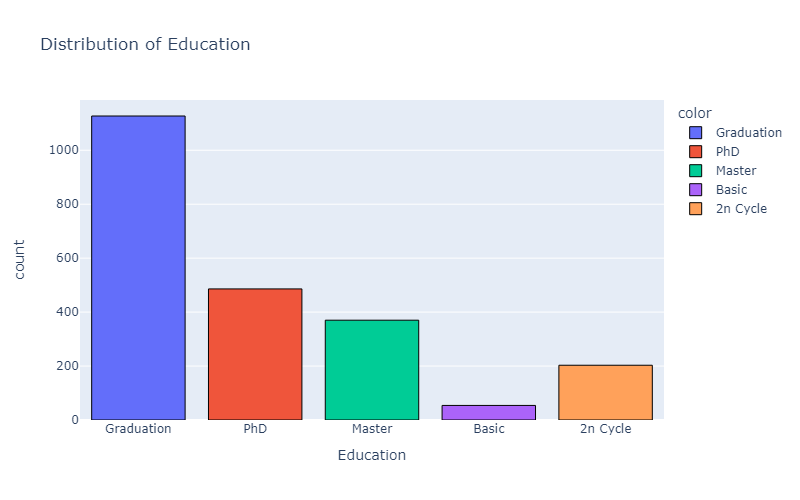

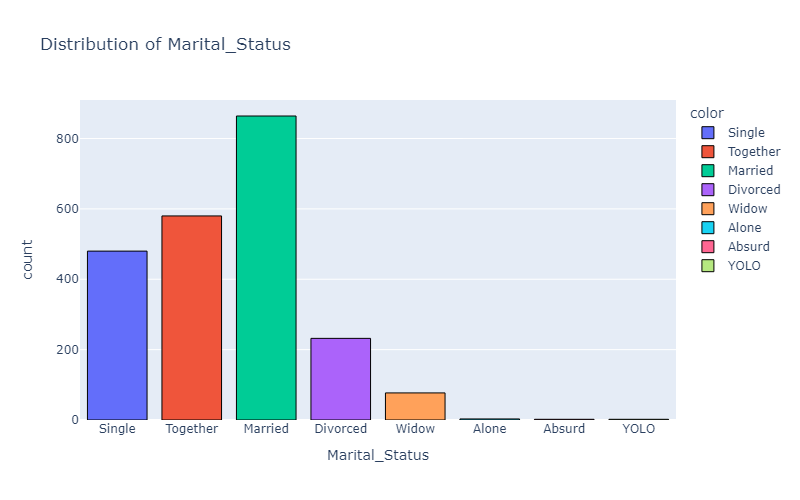

In [15]:
for col in cat_cols[:2]:
    title = f'Distribution of {col}'
    fig = px.histogram(x = data[col], 
                       height = 500, 
                       width = 800,
                       color = data[col], 
                       title = title)
    
    fig.update_layout(xaxis_title = f'{col}')
    
    fig.update_traces(marker_line_color = 'black', marker_line_width = 1)
    fig.show()

- Most of the customers are graduates, followed by PhD holders.
- Most of the customers are either married or together.

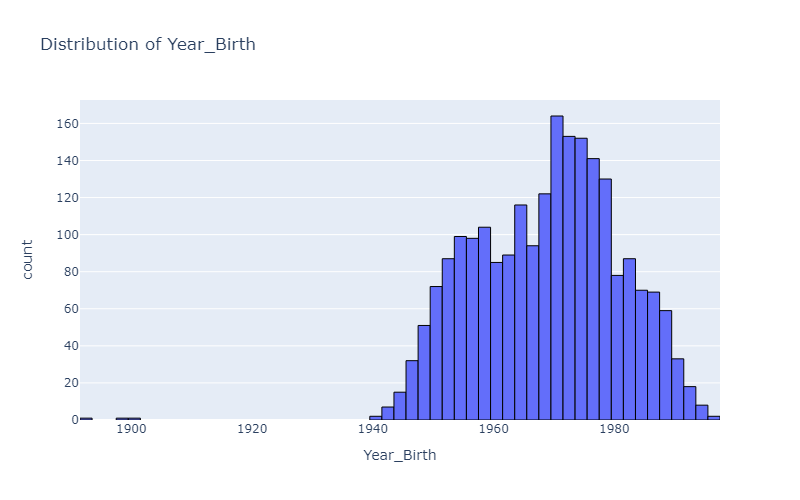

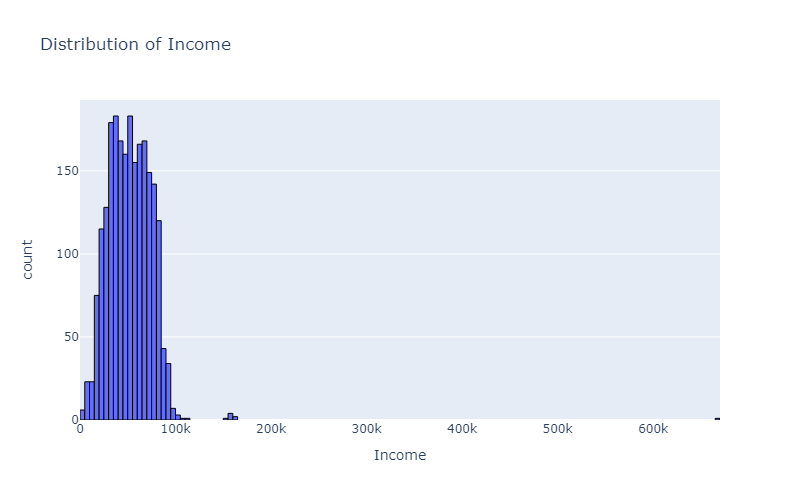

In [16]:
for col in num_cols[1:3]:
    title = f'Distribution of {col}'
    fig = px.histogram(x = data[col], 
                       height = 500, 
                       width = 800,
                       title = title)

    fig.update_layout(xaxis_title = f'{col}')
    
    fig.update_traces(marker_line_color = 'black', marker_line_width = 1)
    fig.show()

Most of the customers earn < 100k. 75% of customers earn about 68k.

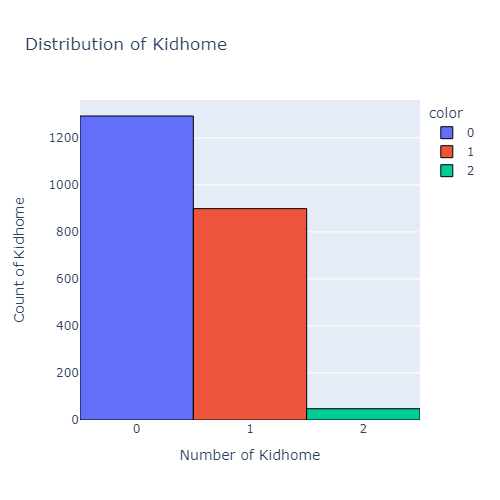

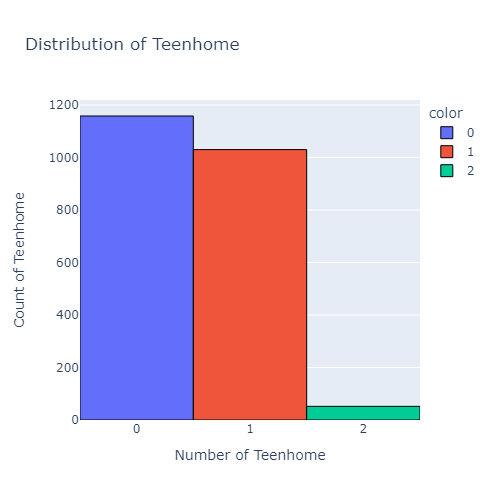

In [17]:
for col in num_cols[3:5]:
    title = f'Distribution of {col}'
    fig = px.histogram(x = data[col],
                       height = 500, 
                       width = 500,
                       color = data[col],
                       title = title)
    
    fig.update_traces(marker_line_color = 'black', 
                      marker_line_width = 1)
    
    fig.update_layout(xaxis_title = f'Number of {col}',
                     yaxis_title = f'Count of {col}')
    fig.show()

Most of the customers have 0-1 kids and 0-1 teenagers at home. Very few people have 2 kids or 2 teenagers at home.

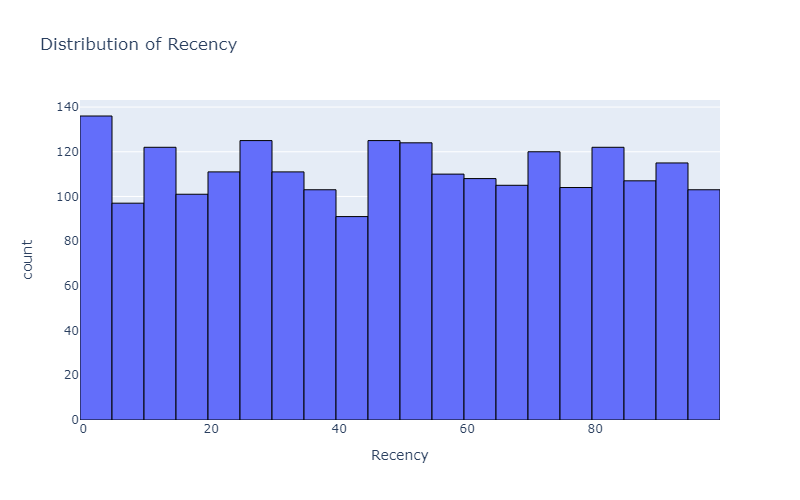

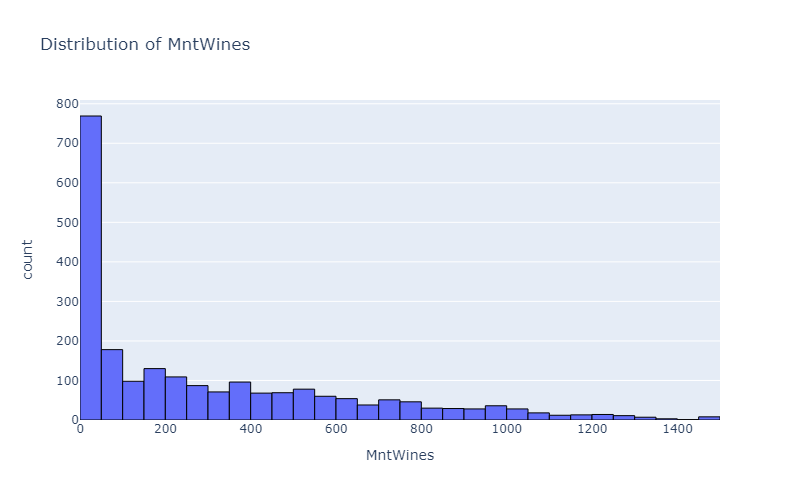

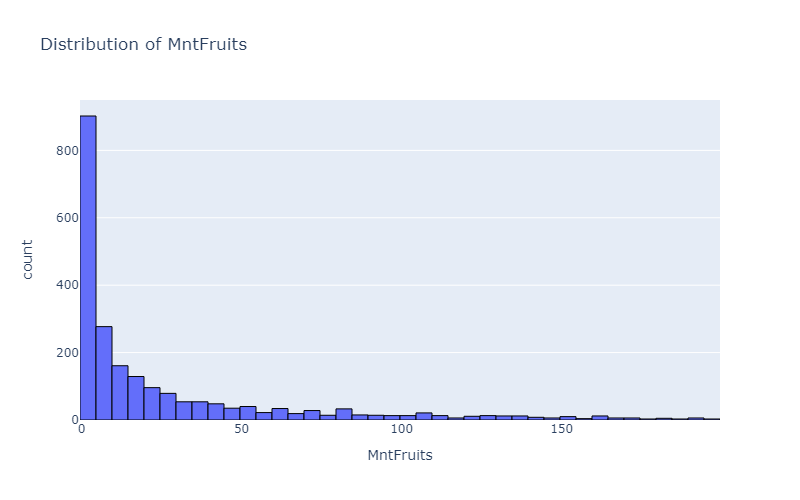

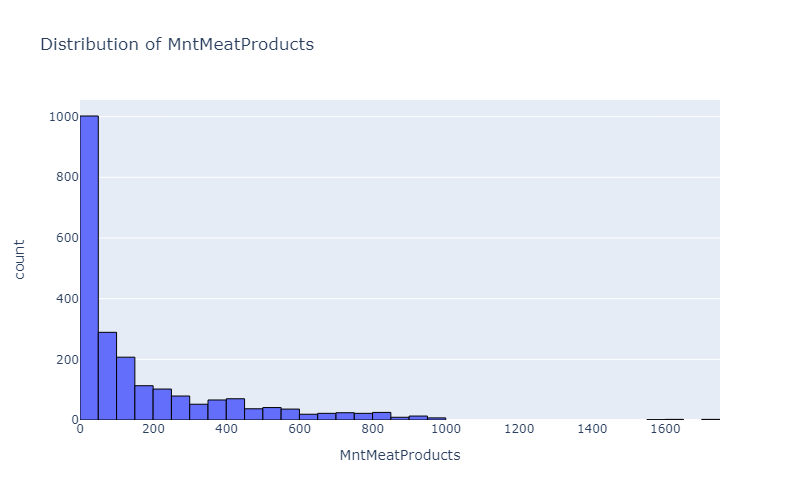

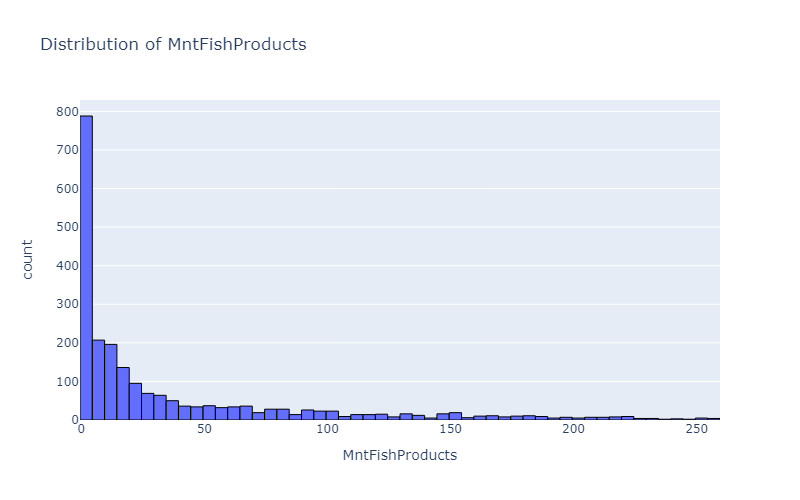

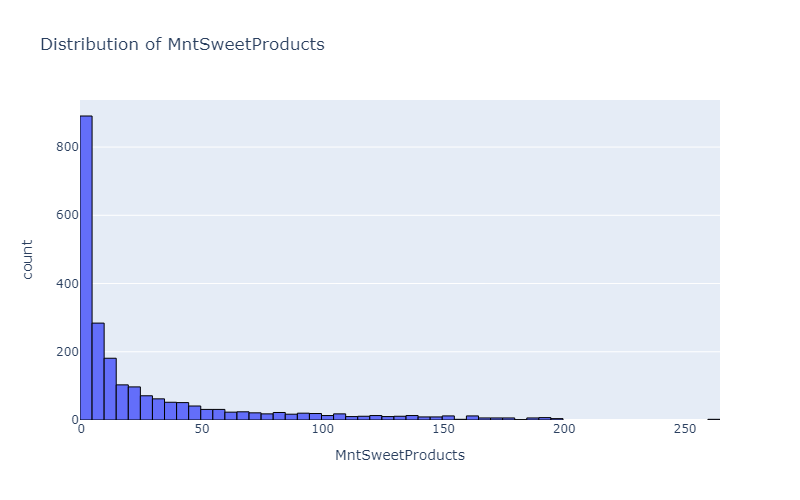

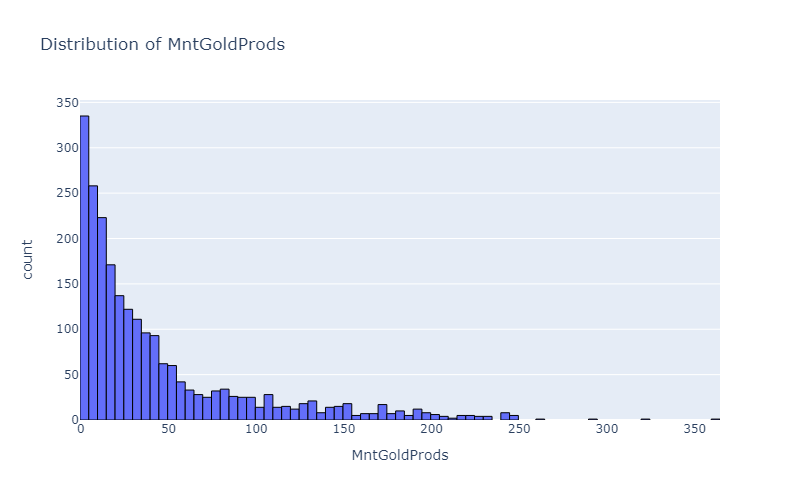

In [18]:
for col in num_cols[5:12]:
    title = f'Distribution of {col}'
    
    fig = px.histogram(x = data[col], 
                       height = 500, 
                       width = 800,
                       title = title)
    
    fig.update_layout(xaxis_title = f'{col}')
    fig.update_traces(marker_line_color = 'black',
                      marker_line_width = 1)
    fig.show()

Not many sales are occuring in any of the products. <br>Most of the products have low to no sales, except for gold products, which show slightly more sales.<br> Maybe descriptive analytics will give us more information.

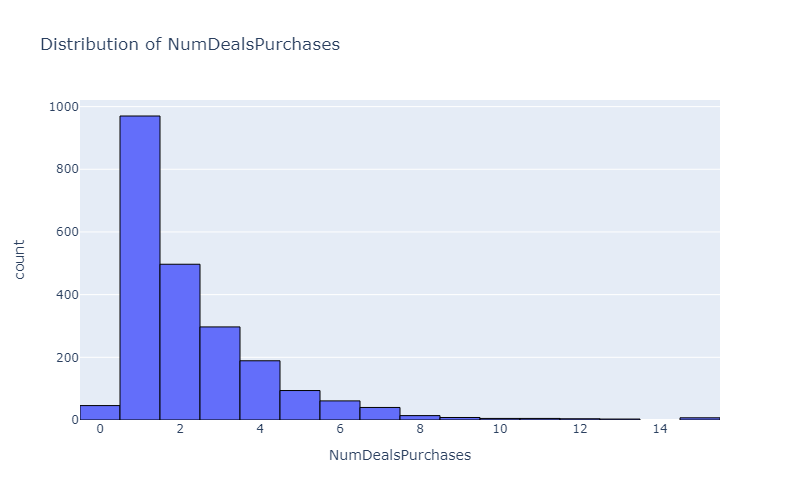

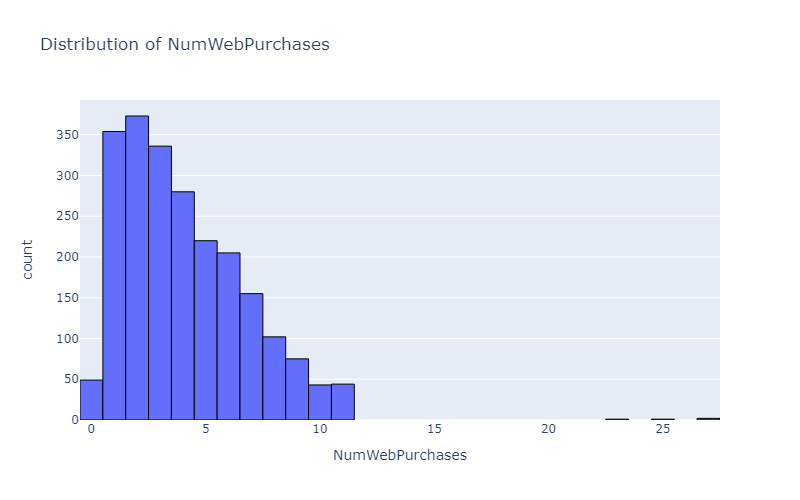

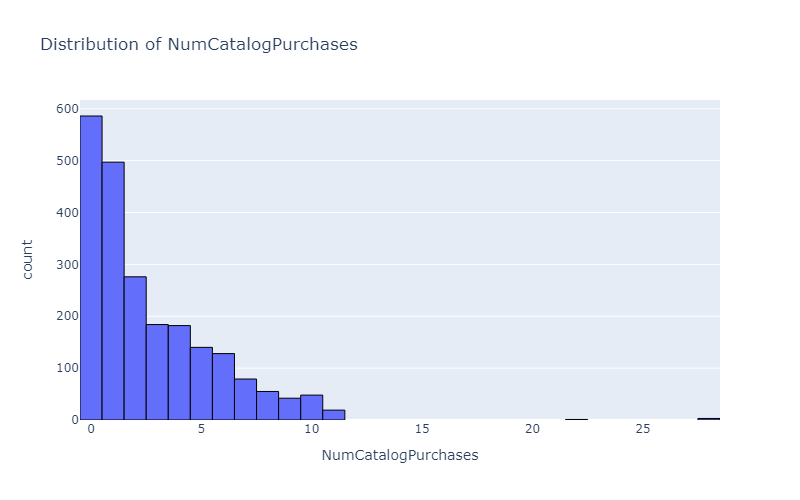

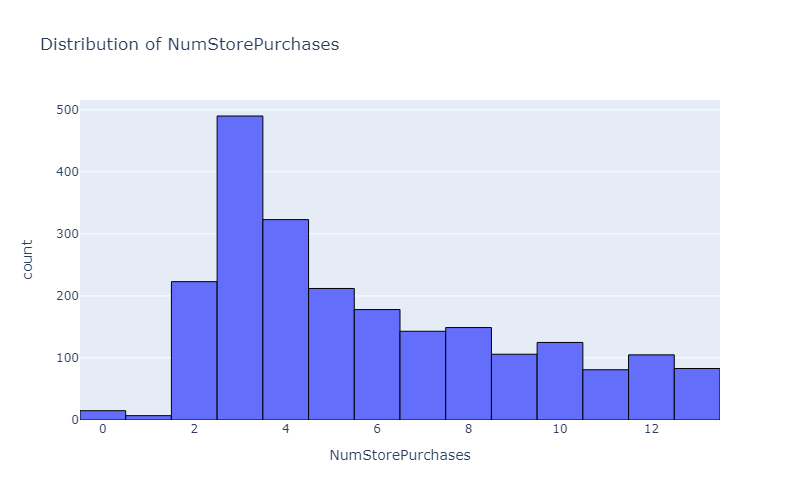

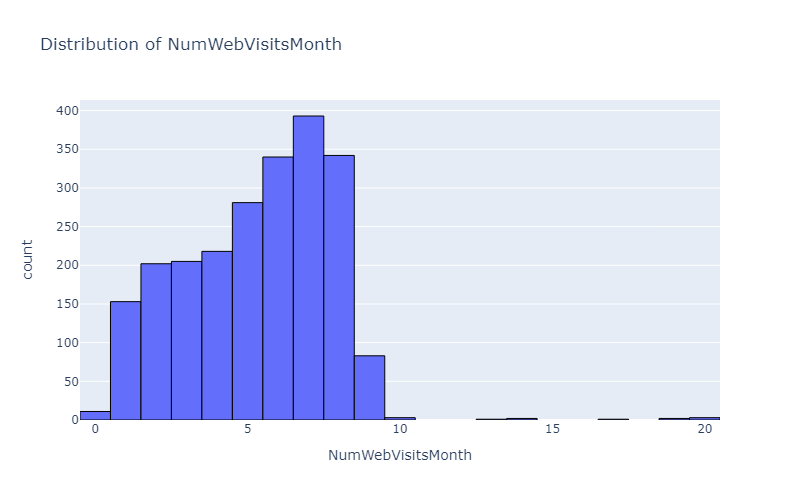

In [19]:
for col in num_cols[12:17]:
    title = f'Distribution of {col}'
    
    fig = px.histogram(x = data[col], 
                       height = 500, 
                       width = 800,
                       title = title)
    
    fig.update_layout(xaxis_title = f'{col}')
    fig.update_traces(marker_line_color = 'black',
                      marker_line_width = 1)
    fig.show()

From the above distributions we can see that:
- People prefer making purchases from the store, followed by making purchases online.
- People do not prefer buying things via catalog.
- Their website is getting decent traffic. **75% of customers** are visiting their website **upto 7 times a month**. Hence, their website has higher customer throughput as compared to other means.
- Most of the customers are making their purchases with one or more discounts.

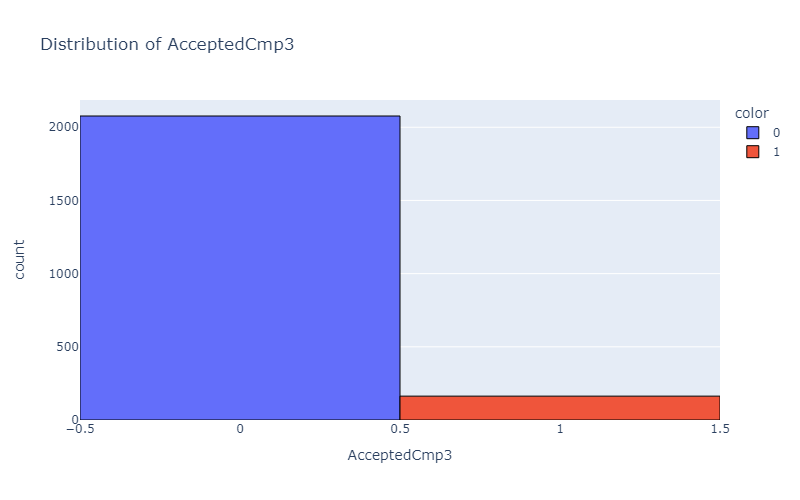

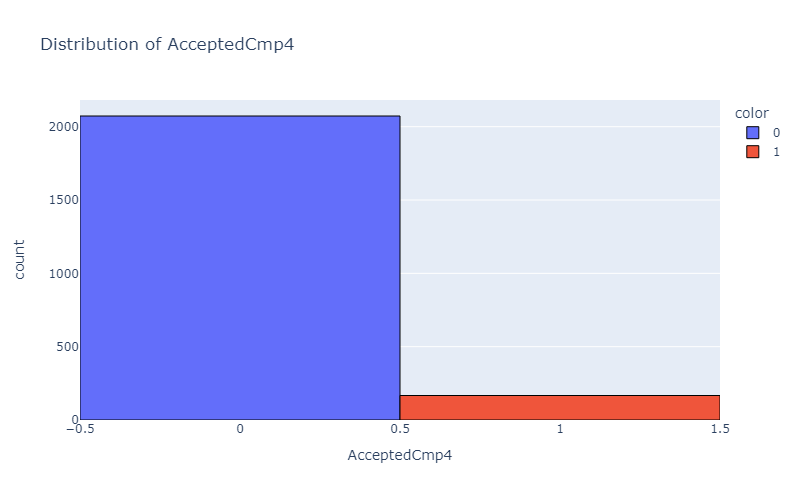

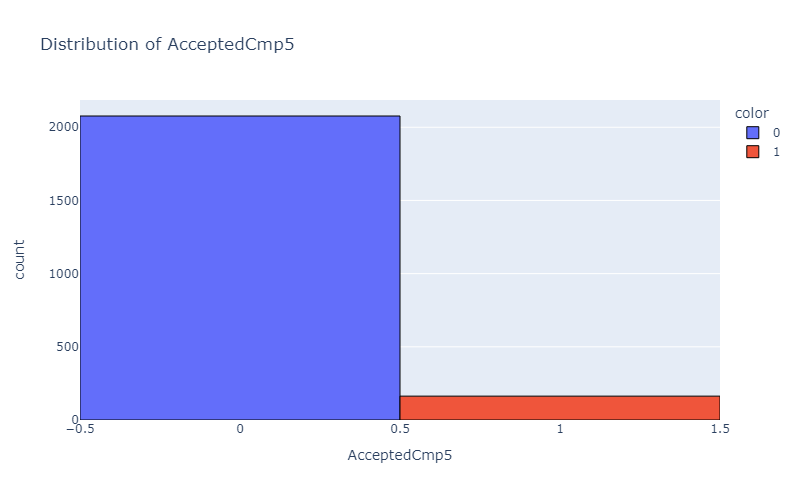

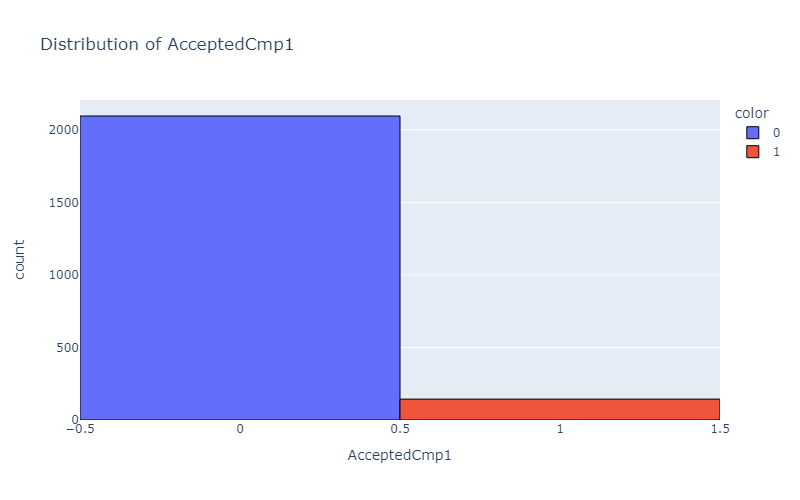

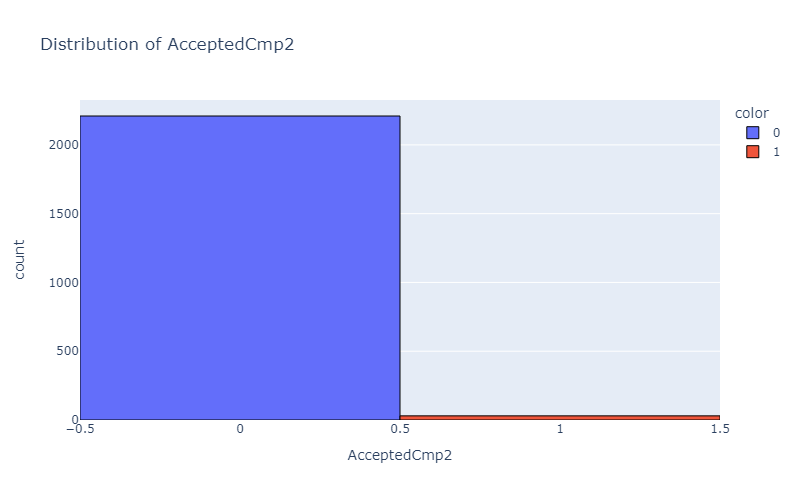

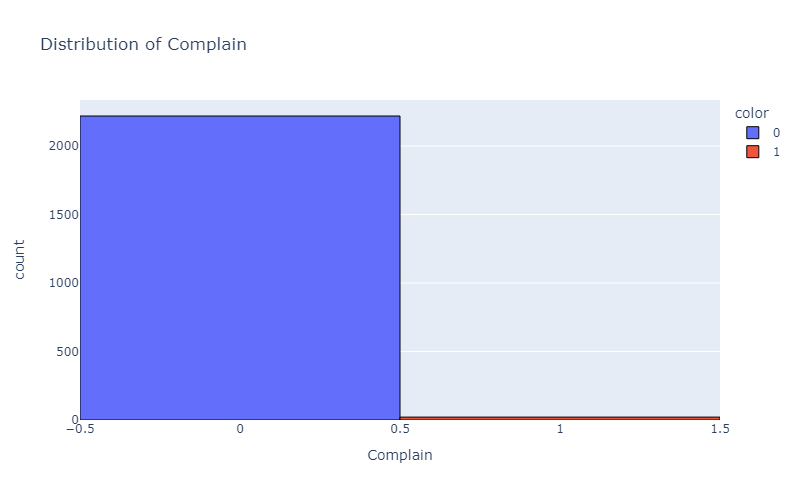

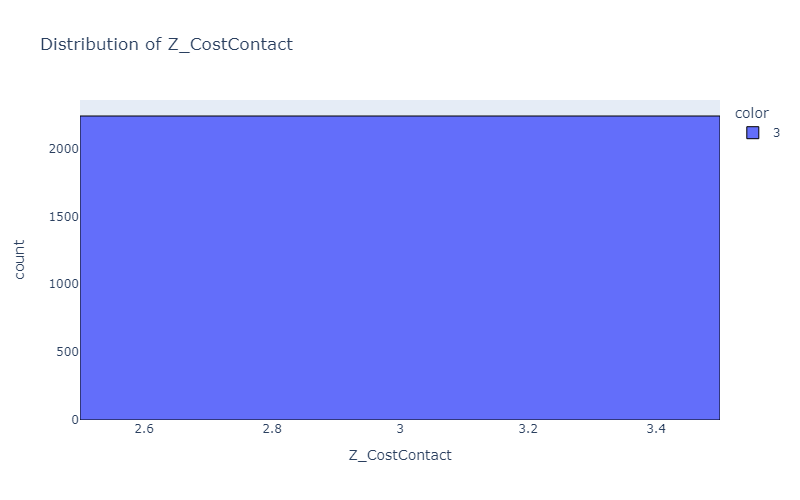

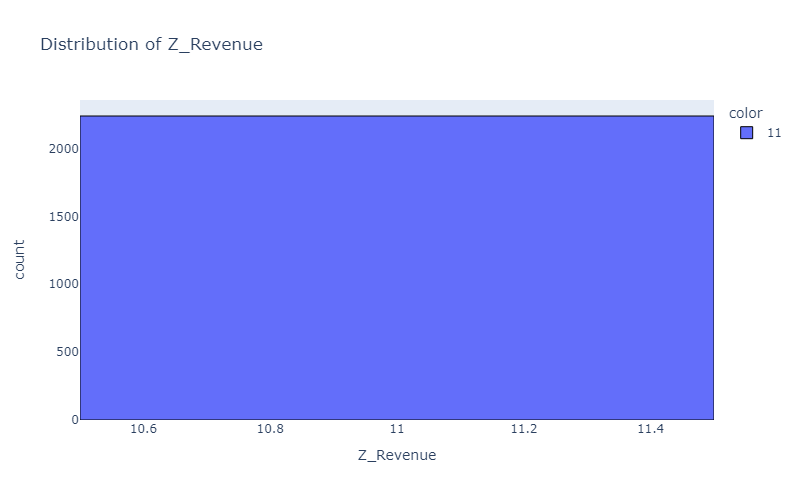

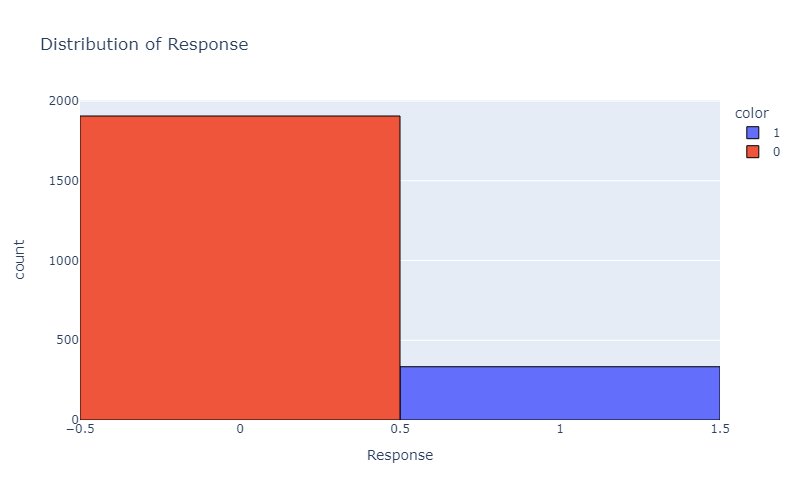

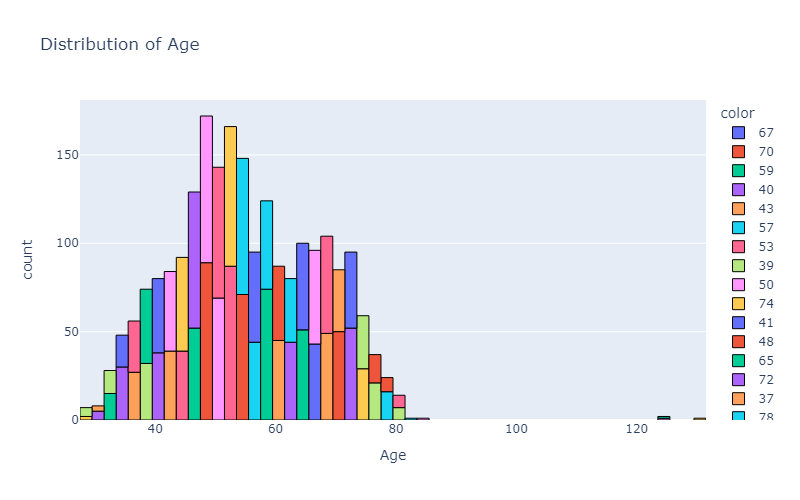

In [20]:
for col in num_cols[17:-2]:
    title = f'Distribution of {col}'
    
    fig = px.histogram(x = data[col], 
                       height = 500, 
                       width = 800,
                       color = data[col],
                       title = title)
    
    fig.update_layout(xaxis_title = f'{col}')
    fig.update_traces(marker_line_color = 'black',
                      marker_line_width = 1)
    fig.show()

From the above distributions, we can infer that:
- Their marketing campaigns are not yeilding much positive results. People are not participating.
- People have raised no complaints against the store. They seem to have good customer support and friendly policies.

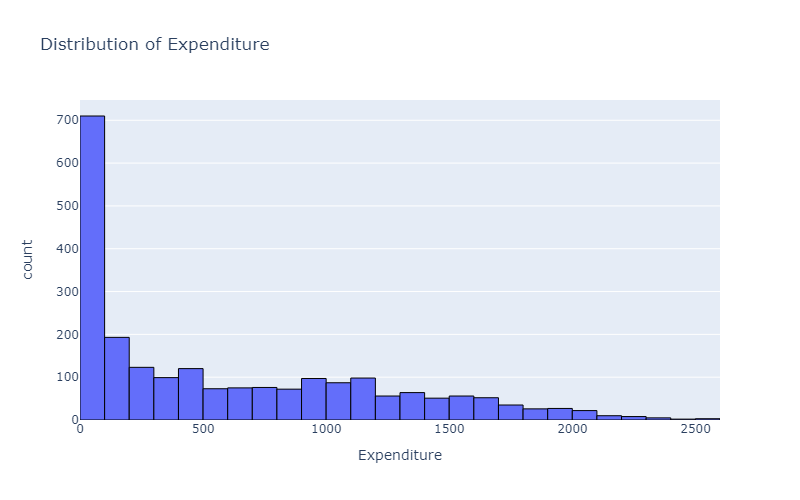

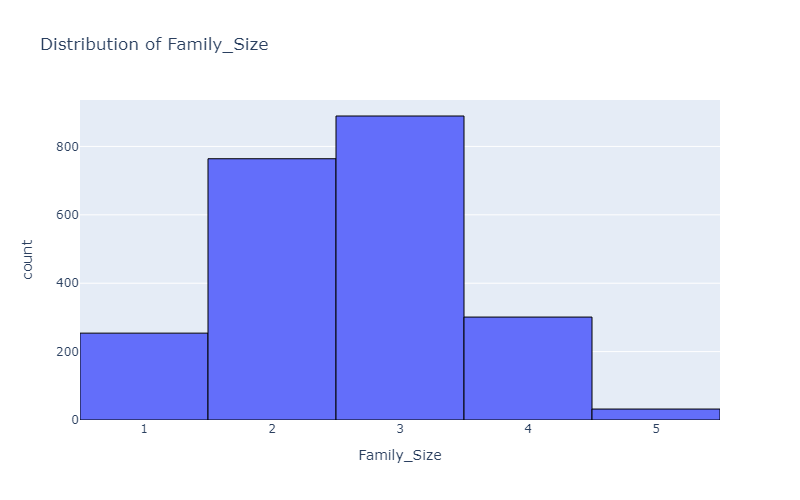

In [21]:
for col in num_cols[-2:]:
    title = f'Distribution of {col}'
    
    fig = px.histogram(x = data[col], 
                       height = 500, 
                       width = 800,
                       title = title)
    
    fig.update_layout(xaxis_title = f'{col}')
    fig.update_traces(marker_line_color = 'black',
                      marker_line_width = 1)
    fig.show()

- People within the age range of 28-81 are making purchases from their store. The **bulk of the customers are 47-65 years old**.
- Mostly people spend upto 99 currency at the store. Otherwise **people spend anywhere between 68 - 1045 currency**.
- Most of the customers have a **family size of 2-3**.

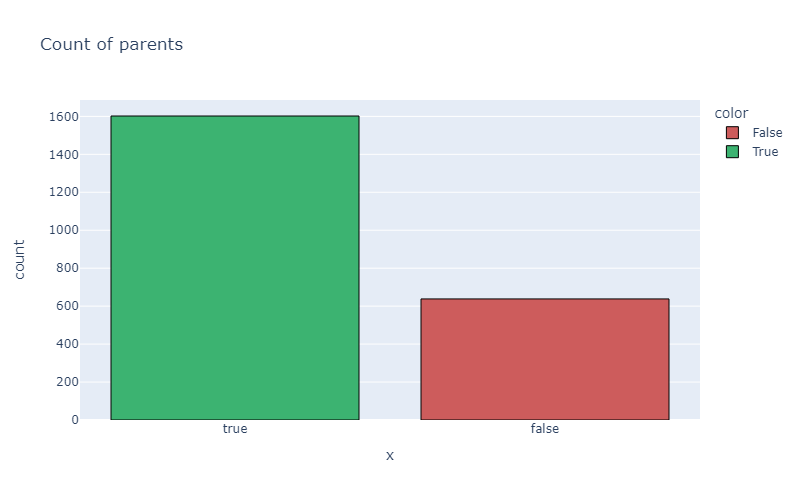

In [22]:
fig = px.histogram(x = data['Is_Parent'],
                  height = 500,
                  width = 800,
                   color = data['Is_Parent'],
                  color_discrete_map = {
                      True: 'mediumseagreen',
                      False: 'indianred'
                  },
                  title = 'Count of parents')

fig.update_xaxes(categoryorder = 'array',
                categoryarray = [True, False]) # To reoeder axis such that True is displayed first

fig.update_traces(marker_line_width = 1, marker_line_color = 'black')

fig.show()

In [23]:
parent_yes = round(data[data['Is_Parent'] == True][['Is_Parent']].shape[0] / data.shape[0] * 100, 2)
parent_no = round(data[data['Is_Parent'] == False][['Is_Parent']].shape[0] / data.shape[0] * 100, 2)

print(f'Percentage of customers who are parents: {parent_yes}%')
print(f'Percentage of customers who are not parents: {parent_no}%')

Percentage of customers who are parents: 71.52%
Percentage of customers who are not parents: 28.48%


- About 3/4th of the customers are parents.
- About 1/4th of the customers are not parents.

In [24]:
data.groupby(by = ['Is_Parent', 'Marital_Status', 'Education']).count()

ID  Year_Birth  Income  Kidhome  \
Is_Parent Marital_Status Education                                      
False     Absurd         Graduation    1           1       1        1   
                         Master        1           1       1        1   
          Divorced       2n Cycle      6           6       6        6   
                         Graduation   31          31      31       31   
                         Master       10          10      10       10   
                         PhD          11          11      11       11   
          Married        2n Cycle     26          26      26       26   
                         Basic         9           9       9        9   
                         Graduation  116         116     116      116   
                         Master       30          30      30       30   
                         PhD          49          49      49       49   
          Single         2n Cycle     12          12      12       12   
                         Basic         2           2       2        2   
                         Graduation   86          86      86       86   
                         Master       29          29      29       29   
                         PhD          38          38      38       38   
          Together       2n Cycle     18          18      18       18   
                         Basic         5           5       5        5   
                         Graduation   75          75      75       75   
                         Master       27          27      27       27   
                         PhD          29          29      29       29   
          Widow          2n Cycle      2           2       2        2   
                         Basic         1           1       1        1   
                         Graduation   12          12      12       12   
                         Master        5           5       5        5   
                         PhD           7           7       7        7   
True      Alone          Graduation    1           1       1        1   
                         Master        1           1       1        1   
                         PhD           1           1       1        1   
          Divorced       2n Cycle     17          17      17       17   
                         Basic         1           1       1        1   
                         Graduation   88          88      88       88   
                         Master       27          27      27       27   
                         PhD          41          41      41       41   
          Married        2n Cycle     55          55      55       55   
                         Basic        11          11      11       11   
                         Graduation  317         317     317      317   
                         Master      108         108     108      108   
                         PhD         143         143     143      143   
          Single         2n Cycle     25          25      25       25   
                         Basic        16          16      16       16   
                         Graduation  166         166     166      166   
                         Master       46          46      46       46   
                         PhD          60          60      60       60   
          Together       2n Cycle     39          39      39       39   
                         Basic         9           9       9        9   
                         Graduation  211         211     211      211   
                         Master       79          79      79       79   
                         PhD          88          88      88       88   
          Widow          2n Cycle      3           3       3        3   
                         Graduation   23          23      23       23   
                         Master        7           7       7        7   
                         PhD          17          17      17       17   
          YOLO         

In [25]:
cat_cols

['Education', 'Marital_Status', 'Dt_Customer', 'Is_Parent']

In [26]:
data_new = data.drop(columns = ['Dt_Customer', 'ID'])

# Principal Component Analysis starts below 🧮

### [_Principal Component Analysis (PCA)_](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) is a machine learning technique used to decompose a multivariate dataset in a set of successive orthogonal components that explain a maximum amount of the variance, while also projecting the initial dataset into a lower dimensional feature space. <br><br>In other words, PCA is a technique used to create new compound features (called _Principal Components_) from existing features such that the new features capture a given amount of variance. This allows us to reduce the number of features that any successive machine learning algorithm needs to work with, effectively "trimming the fat". <br><br> Read more about PCA [here](https://scikit-learn.org/stable/modules/decomposition.html#pca).

In [27]:
# Since sk-learn's PCA function does not scale the data before centering it, 
# we scale and one hot encode the data manually by making the use of column transformers and pipelines.

scr = StandardScaler()
ohe = OneHotEncoder(drop = 'first',
                   sparse_output = False,
                   handle_unknown = 'ignore',
                   dtype='int64').set_output(transform = 'pandas')

num_col_tx = make_column_selector(dtype_include = ['int64', 'float64']) # All numeric columns
cat_col_tx = make_column_selector(dtype_exclude = ['int64', 'float64']) # All categorical columns

col_tx = make_column_transformer((scr, num_col_tx),
                                (ohe, cat_col_tx), 
                                n_jobs = -1, 
                                remainder = 'passthrough',
                                verbose_feature_names_out = False).set_output(transform = 'pandas')

data_scaled = col_tx.fit_transform(data_new)

In [28]:
data_scaled

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Is_Parent_True
0,-0.985345,0.235327,-0.825218,-0.929894,0.307039,0.983781,1.551577,1.679702,2.462147,1.476500,...,0,0,0,0,0,1,0,0,0,0
1,-1.235733,-0.235826,1.032559,0.906934,-0.383664,-0.870479,-0.636301,-0.713225,-0.650449,-0.631503,...,0,0,0,0,0,1,0,0,0,1
2,-0.317643,0.773633,-0.825218,-0.929894,-0.798086,0.362723,0.570804,-0.177032,1.345274,-0.146905,...,0,0,0,0,0,0,1,0,0,0
3,1.268149,-1.022732,1.032559,-0.929894,-0.798086,-0.870479,-0.560857,-0.651187,-0.503974,-0.583043,...,0,0,0,0,0,0,1,0,0,1
4,1.017761,0.241519,1.032559,-0.929894,1.550305,-0.389085,0.419916,-0.216914,0.155164,-0.001525,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,-0.150717,0.358568,-0.825218,0.906934,-0.107383,1.203678,0.419916,0.066692,0.081926,2.203398,...,0,0,0,0,1,0,0,0,0,1
2236,-1.903435,0.470064,2.890335,0.906934,0.237969,0.303291,-0.661449,-0.606873,-0.687068,-0.655733,...,0,1,0,0,0,0,1,0,0,1
2237,1.017761,0.189106,-0.825218,-0.929894,1.446700,1.795020,0.545656,0.221789,-0.101168,-0.364974,...,0,0,0,1,0,0,0,0,0,0
2238,-1.068807,0.679035,-0.825218,0.906934,-1.419719,0.368666,0.092992,0.208495,0.777683,0.071165,...,1,0,0,0,0,0,1,0,0,1


In [29]:
data_scaled.shape

(2240, 40)

In [30]:
2240*39

87360


Number of PCA components required to explain ~95.7% of vairance:  23



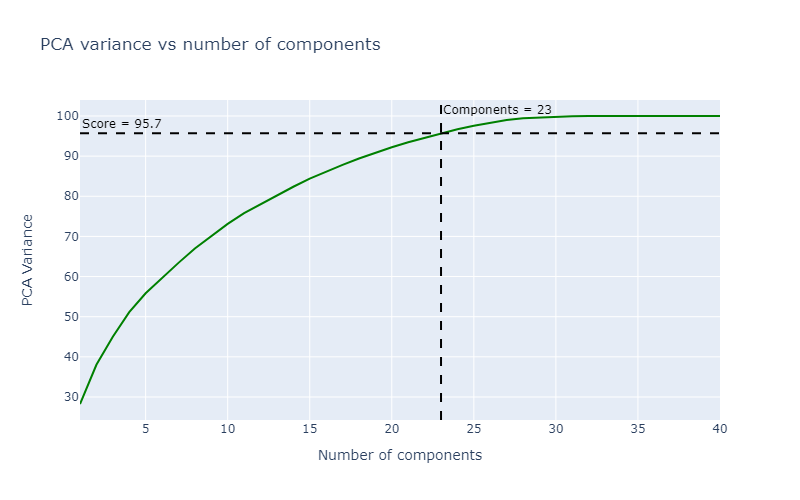

In [31]:
pca = PCA(0.95, random_state = seed).set_output(transform = 'pandas')
data_pca = pca.fit_transform(data_scaled)

pca_var = pca.n_components * 100
pca_components = pca.n_components_
num_features = data_scaled.shape[1]+1

pca_score = []

for i in range (1, num_features):
    pca_test = PCA(i, random_state = seed)
    pca_test_data = pca_test.fit_transform(data_scaled)
    
    score = 0
    for value in pca_test.explained_variance_ratio_:
        score += (value*100)
    pca_score.append(score)

score_y = 0
for value in pca.explained_variance_ratio_:
    score_y += (value*100)


fig = px.line(x = range(1, num_features),
              y = pca_score, 
              height = 500,
              width = 800,
              color_discrete_sequence = ['green'],
              title = 'PCA variance vs number of components'
              )

fig.add_hline(y = score_y, 
              line_dash = 'dash', 
              line_color = 'black', 
              annotation_text = f'Score = {round(score_y, 2)}', 
              annotation_position = 'top left',
              annotation_font_color = 'black')

fig.add_vline(x = pca_components, 
              line_dash = 'dash', 
              line_color = 'black', 
              annotation_text = f'Components = {pca_components}', 
              annotation_position = 'top right',
              annotation_font_color = 'black')

fig.update_layout(xaxis_title = 'Number of components', yaxis_title = 'PCA Variance')

print(f'\nNumber of PCA components required to explain ~{round(score_y, 2)}% of vairance:  {pca_components}\n')

fig.show()

In [32]:
data_pca.shape

(2240, 23)

In [33]:
data.shape

(2240, 33)

# Clustering starts below ⚙️

### Clustering is an unsupervised Machine Learning technique used to group similar data points together, without the need of labelled data.<br><br> The clusters are formed in such a way that all points within a cluster are highly similar while the clusters themselves are highly dissimilar to each other.<br>In other words, clustering aims to maximize intra-cluster similarity while minimizing inter-cluster similarity.<br><br>Read more about clustering [here](https://scikit-learn.org/stable/modules/clustering.html#clustering).

## KMeans clustering ⚛️
### The KMeans algorithm clusters data by trying to separate samples in _k_ groups of equal variance, minimizing a criterion known as the _inertia_ or within-cluster sum-of-squares.<br><br> Read more about KMeans clustering [here](https://scikit-learn.org/stable/modules/clustering.html#k-means).

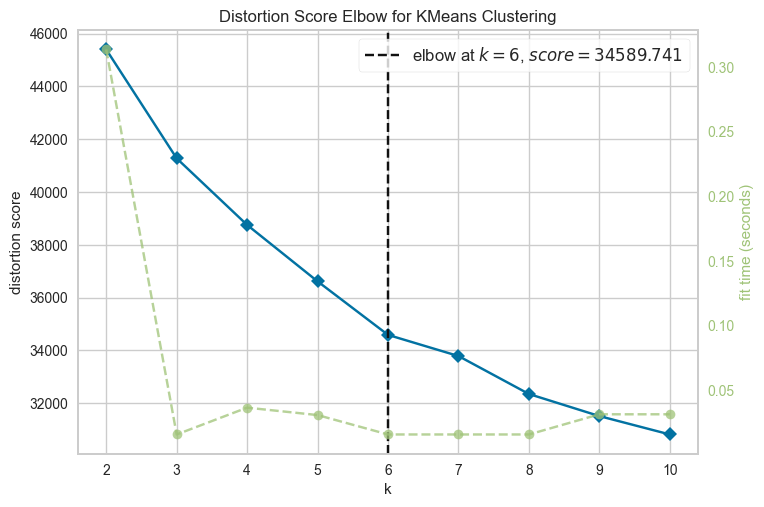

In [34]:
kmeans = KMeans(random_state = seed) # Initial vanilla KMeans object

kmeans_viz = KElbowVisualizer(kmeans, k = 10)

kmeans_viz.fit(data_pca)
kmeans_viz.show()

num_clusters = kmeans_viz.elbow_value_

In [35]:
KMeans_opt = KMeans(n_clusters = num_clusters,
                   random_state = seed)

data['Cluster_KM'] = KMeans_opt.fit_predict(data_pca)

## Agglomerative Clustering 🔗
### Agglomerative clustering is a part of a family of heirarchical clustering algorithms.<br> It recursively merges pairs of clusters in a bottom-up approach, where each data point starts as its own cluster.<br><br> Read more about hierarchical clustering [here](https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering).

In [36]:
Agg_Cls = AgglomerativeClustering(n_clusters = num_clusters) # Using the same number of clusters found by KElbowVisualizer
data['Cluster_Agg'] = Agg_Cls.fit_predict(data_pca)

In [37]:
data[['Cluster_KM', 'Cluster_Agg']]

,Cluster_KM,Cluster_Agg
0,5,2
1,0,0
2,5,2
3,3,3
4,3,3
...,...,...
2235,1,2
2236,0,1
2237,5,0
2238,1,2


## DBSCAN ⭕
### _Density-Based Spatial Clustering of Applications with Noise (DBSCAN)_ is a density based clustering algorithm which clusters areas with a high density of data points as individual clusters.<br>Good for data which contains clusters of similar density.<br><br>Read more about DBSCAN [here](https://scikit-learn.org/stable/modules/clustering.html#dbscan).

In [38]:
DBS_cls = DBSCAN(n_jobs = -1, eps = 1) # Using eps = 1 because default value of eps = 0.5 was not forming any clusters, aka, all clusters were -1
test_dbs = DBS_cls.fit_predict(data_pca)
test_dbs

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [39]:
np.unique(test_dbs)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [40]:
sil_score = metrics.silhouette_score(X = data_pca,
                         labels = test_dbs)
sil_score

-0.23483773345141395

DBSCAN without parameter tuning is not performing well. We are getting negative value for silhouette score.
We will use _Optuna_ to maximize the value of silhouette score and find the best parameters for the given dataset.

## Optuna 🤖
### _Optuna_ is an open-source hyperparameter optimization framework which uses automated search to find the best parameters for any given algorithm.<br> It can efficiently search large hyperparameter spaces and _prune unpromising trials_.<br> It also _parallelizes_ the search process over multiple threads to improve search time.<br><br>Read more about Optuna [here](https://optuna.org).

In [41]:
def objective(trial):
    params_dbs = {
        'eps': trial.suggest_float('eps', 0.1, 10, log = True),
        'min_samples': trial.suggest_int('min_samples', 1, 50),
    }
    
    dbscan_optuna = DBSCAN(**params_dbs, n_jobs = -1)
    temp_labels = dbscan_optuna.fit_predict(data_pca)
    
    score = metrics.silhouette_score(X = data_pca, labels = temp_labels)
    
    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials = 1000, show_progress_bar=True, catch=(ValueError))

  0%|          | 0/1000 [00:00<?, ?it/s]

In [42]:
sil_score_opt = study.best_value
print(f'Silhouette score before optimizing: {round(sil_score, 2)}')
print(f'Silhouette score after optimizing: {round(sil_score_opt, 2)}')
print(f'Percentage increase: {round((sil_score_opt - sil_score)/sil_score * 100 * -1, 2)}%')

Silhouette score before optimizing: -0.23
Silhouette score after optimizing: 0.49
Percentage increase: 310.08%


In [43]:
dbscan_params = study.best_params
print(f'Best parameters for DBSCAN:\n{dbscan_params}')

Best parameters for DBSCAN:
{'eps': 8.924314348175201, 'min_samples': 25}


In [44]:
dbscan = DBSCAN(**dbscan_params, n_jobs = -1)
dbscan_labels = dbscan.fit_predict(data_pca)
np.unique(dbscan_labels)

array([-1,  0], dtype=int64)

### Optuna found the best parameters for DBSCAN for the given dataset.<br><br> Even if there is ~300% increase in the evaluation metric's score, DBSCAN has clustered the data into 2 groups: 1 giant cluster and other outliers/noise points. This isn't useful as there is essentially no clustering.<br>Maybe density-based clustering is not the best algorithm for the data at hand.<br><br> Hence, we will **not use DBSCAN for any further analyses**.<br><br>Still we will keep it in the dataset for exploration purposes.

In [45]:
data['Cluster_DBS'] = dbscan_labels

In [46]:
data[['Cluster_KM', 'Cluster_Agg', 'Cluster_DBS']]

,Cluster_KM,Cluster_Agg,Cluster_DBS
0,5,2,0
1,0,0,0
2,5,2,0
3,3,3,0
4,3,3,0
...,...,...,...
2235,1,2,0
2236,0,1,0
2237,5,0,0
2238,1,2,0


In [47]:
data_new[['Cluster_KM', 'Cluster_Agg', 'Cluster_DBS']] = data[['Cluster_KM', 'Cluster_Agg', 'Cluster_DBS']]

# Analysis of the clusters 📊
## Now we will take a look at the feature distribution within the clusters,  along with the distribution of the clusters themselves.

## KMeans Clusters

In [48]:
data_new.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age',
       'Expenditure', 'Family_Size', 'Is_Parent', 'Cluster_KM', 'Cluster_Agg',
       'Cluster_DBS'],
      dtype='object')

In [49]:
columns = ['Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age',
       'Expenditure', 'Family_Size', 'Is_Parent']

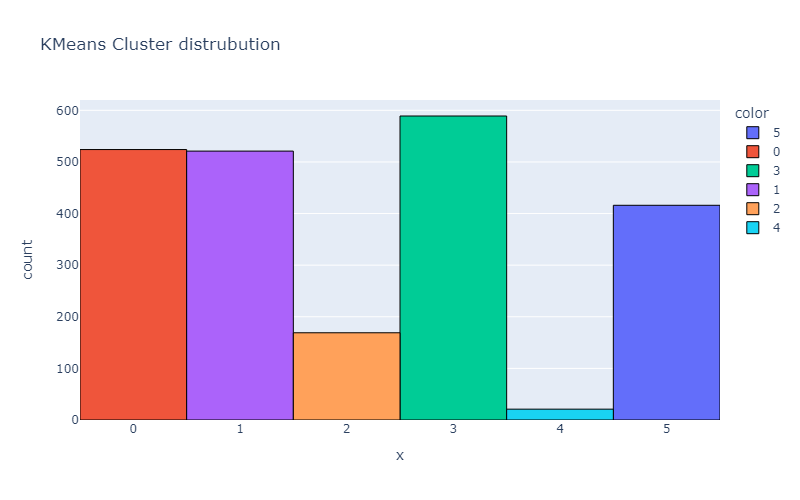

In [50]:
fig = px.histogram(x = data_new['Cluster_KM'], 
                   height = 500,
                   width = 800,
                   color = data_new['Cluster_KM'],
                  title = 'KMeans Cluster distrubution')
fig.update_traces(marker_line_color = 'black', marker_line_width = 1)
fig.show()

In [51]:
print('K-Means cluster distributions in percentage:\n')
for cluster in range(0, 6):
    total = (data_new['Cluster_KM'] == cluster).sum()
    perc = (total/data_new.shape[0]) * 100
    str = f'Cluster {cluster}: {round(perc, 2)}%'
    print(str)

K-Means cluster distributions in percentage:

Cluster 0: 23.39%
Cluster 1: 23.26%
Cluster 2: 7.54%
Cluster 3: 26.29%
Cluster 4: 0.94%
Cluster 5: 18.57%


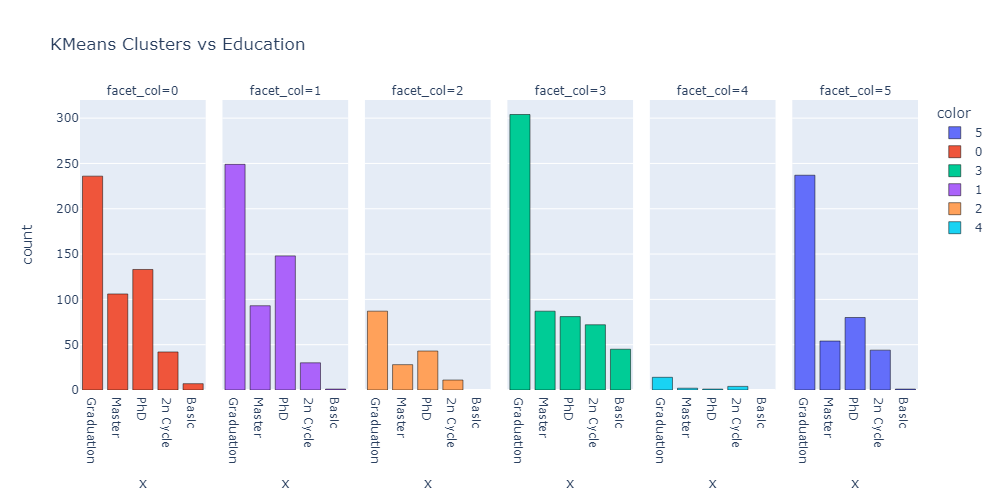

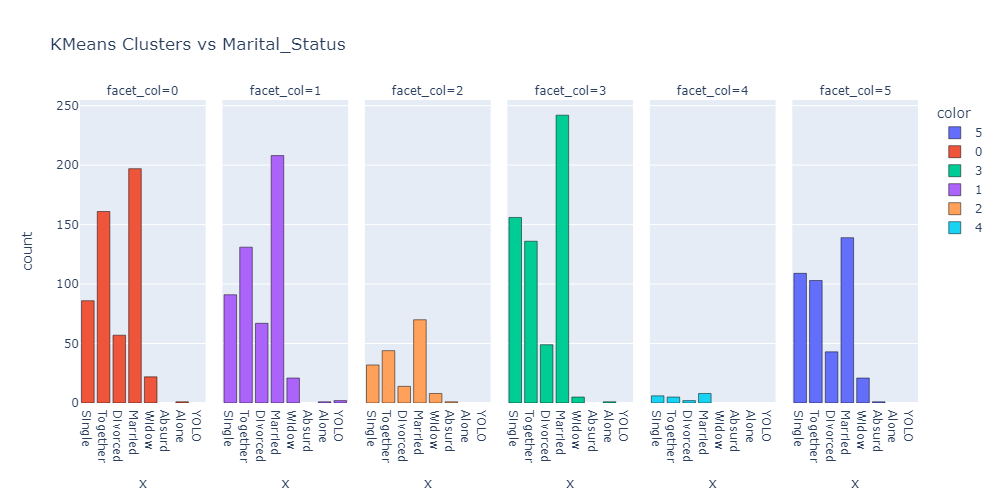

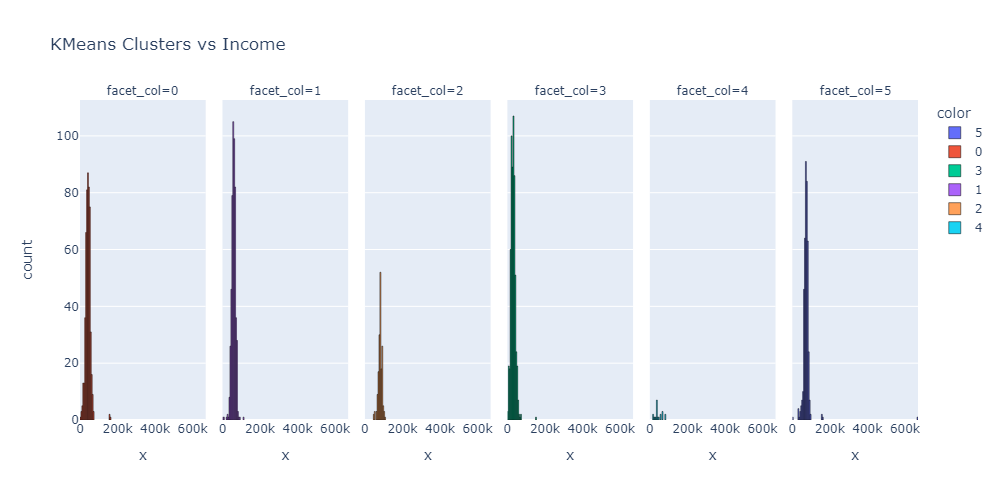

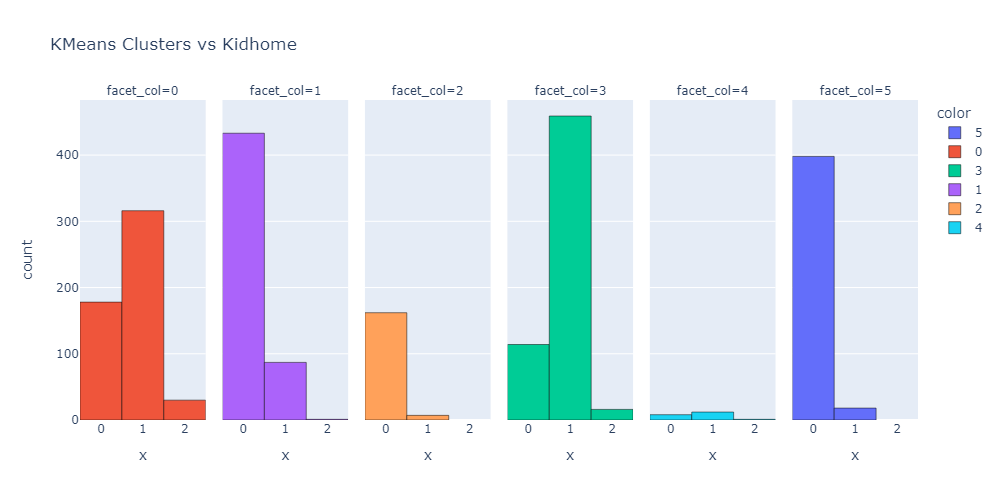

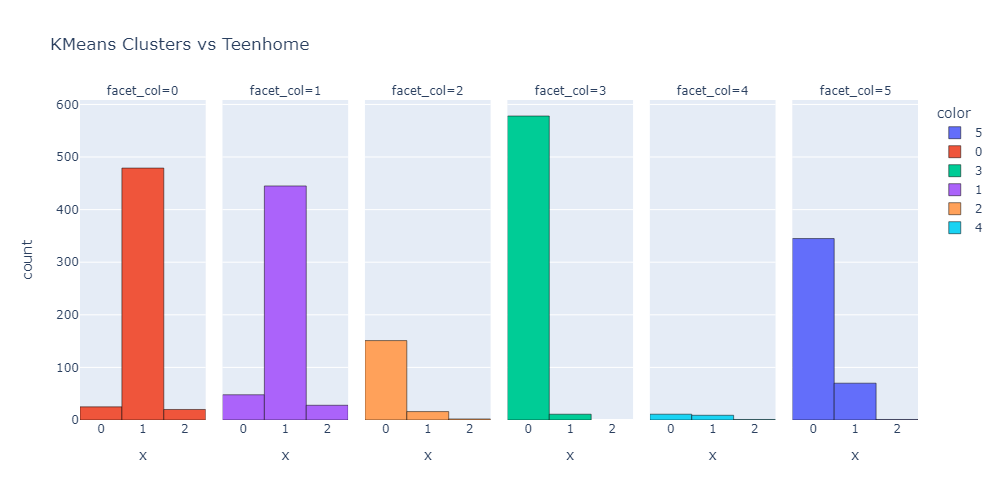

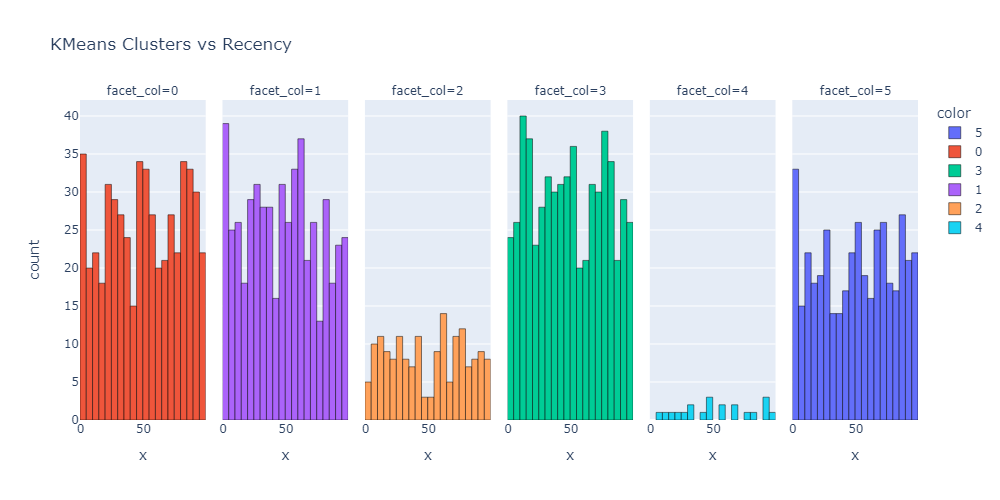

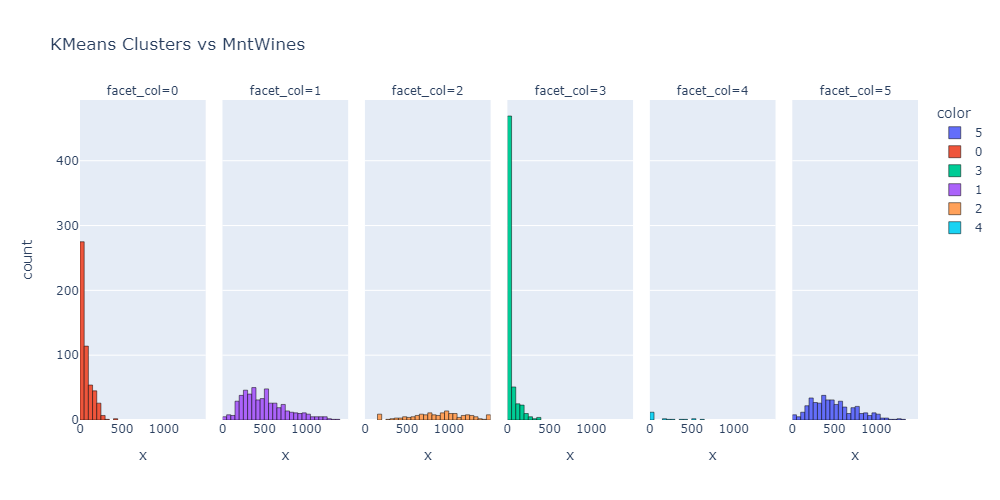

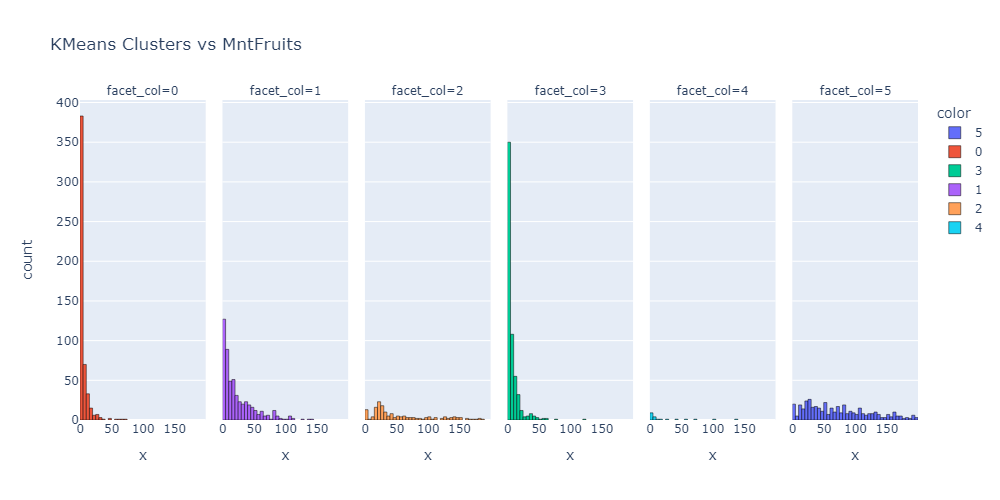

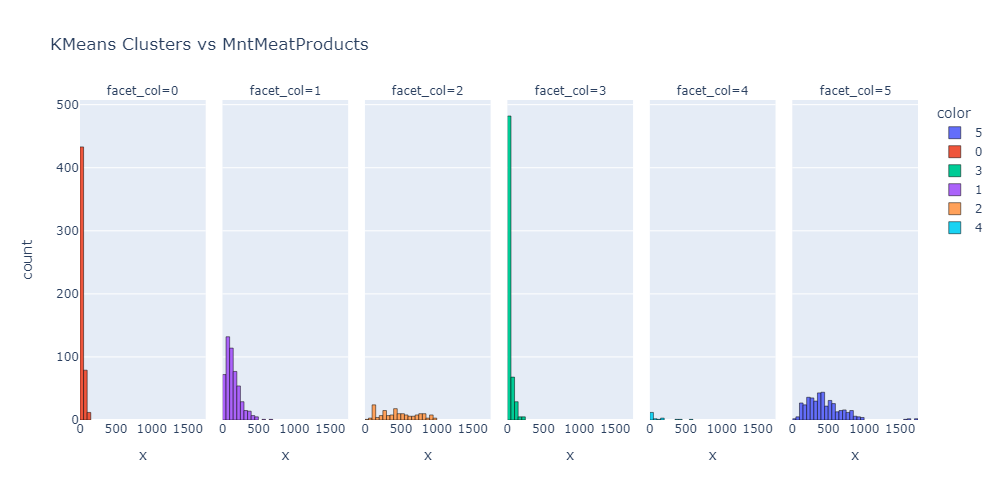

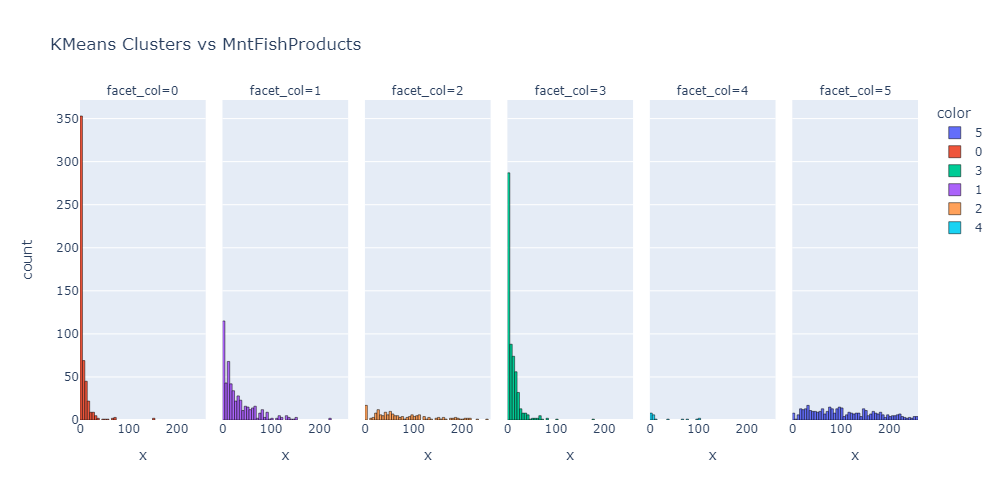

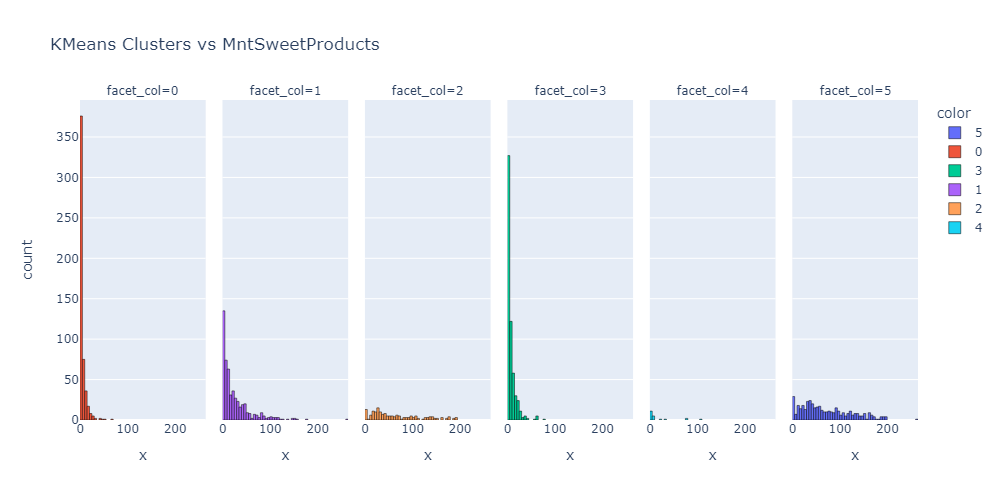

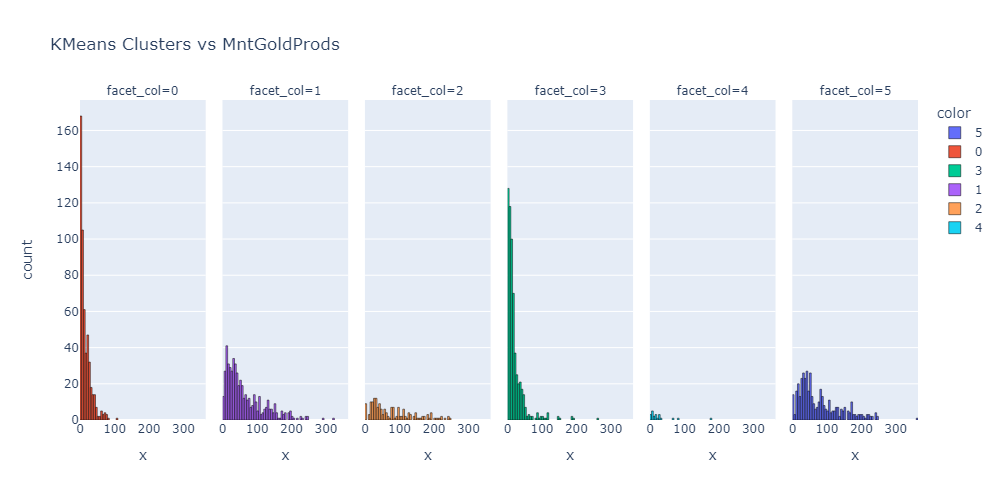

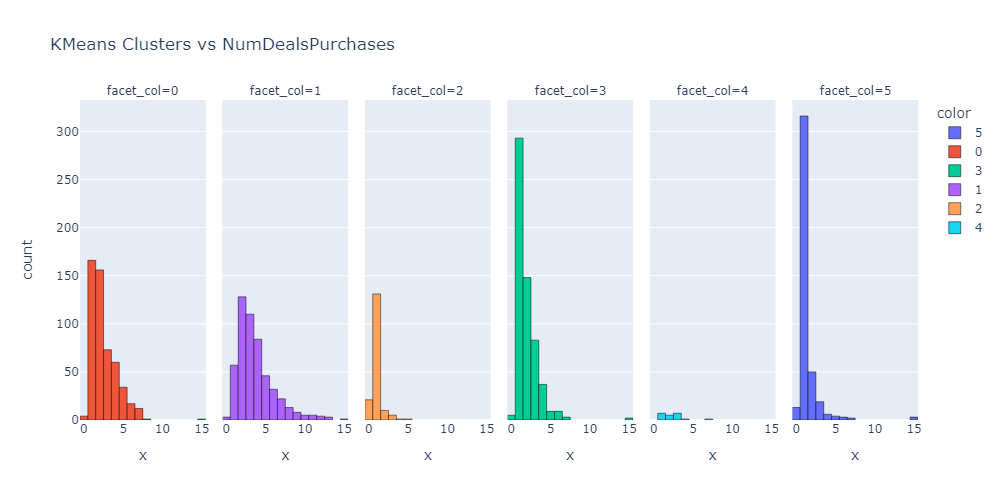

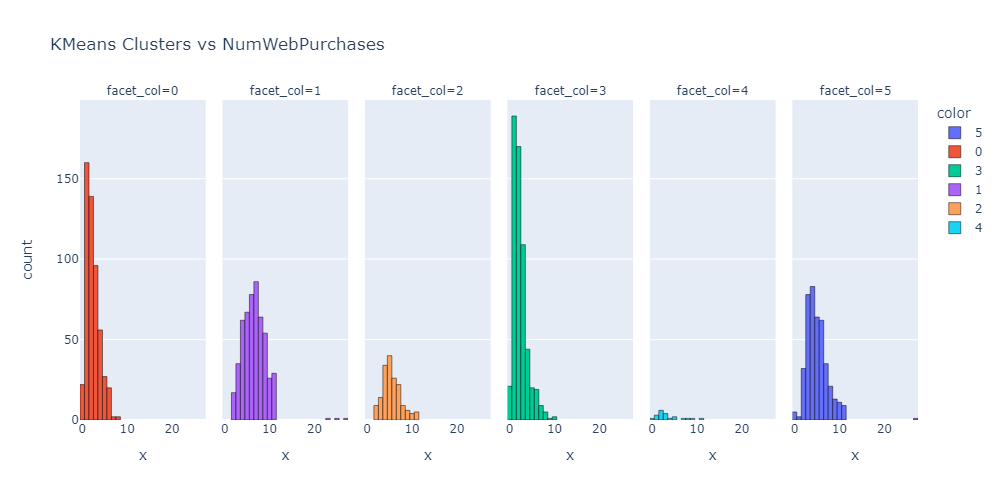

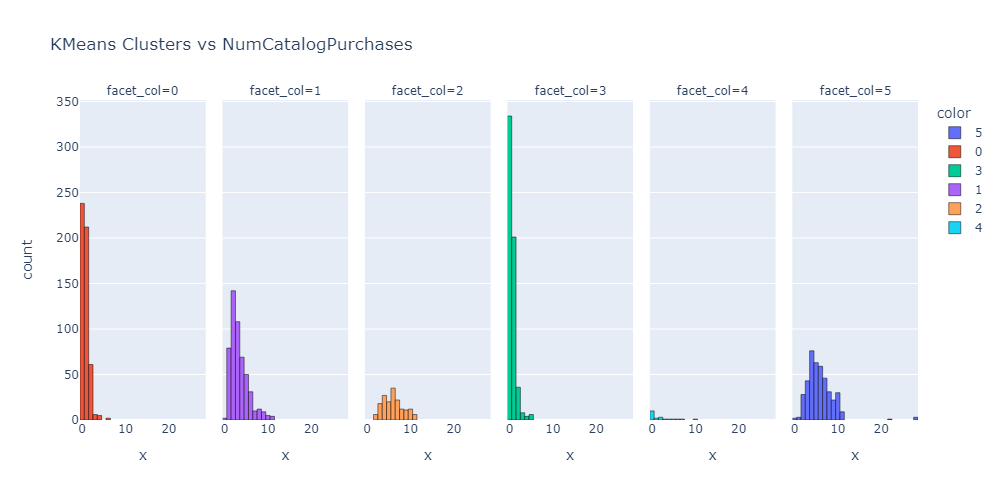

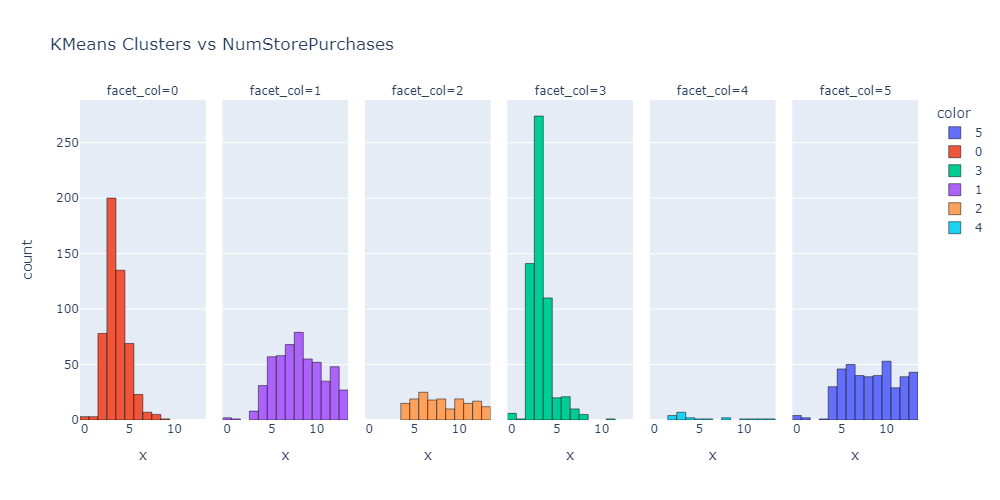

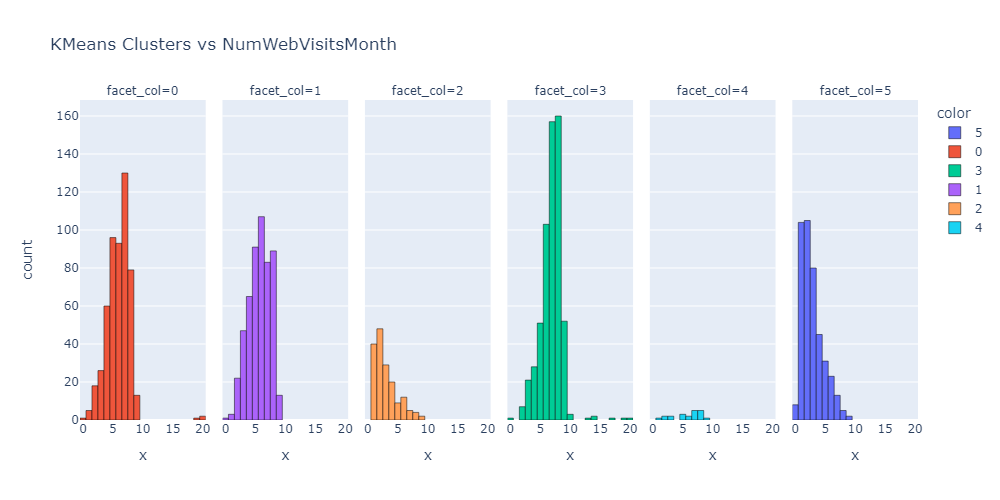

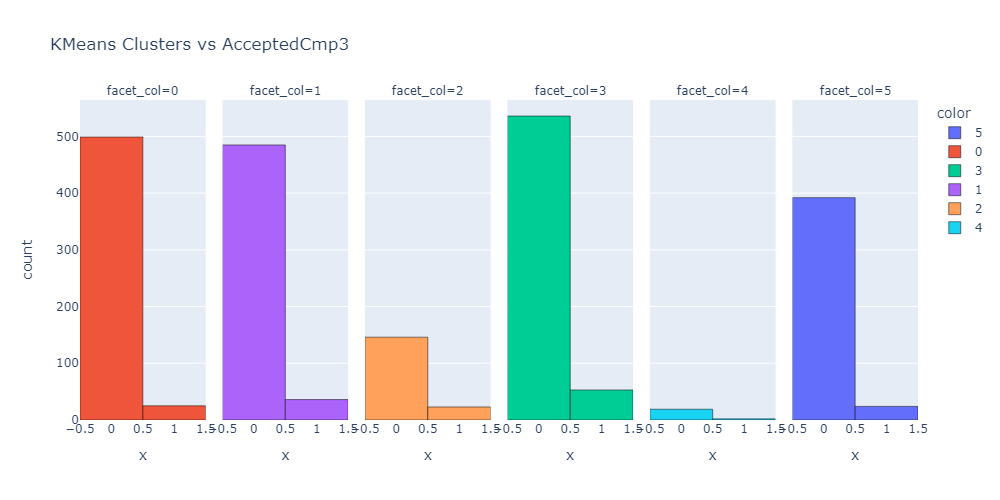

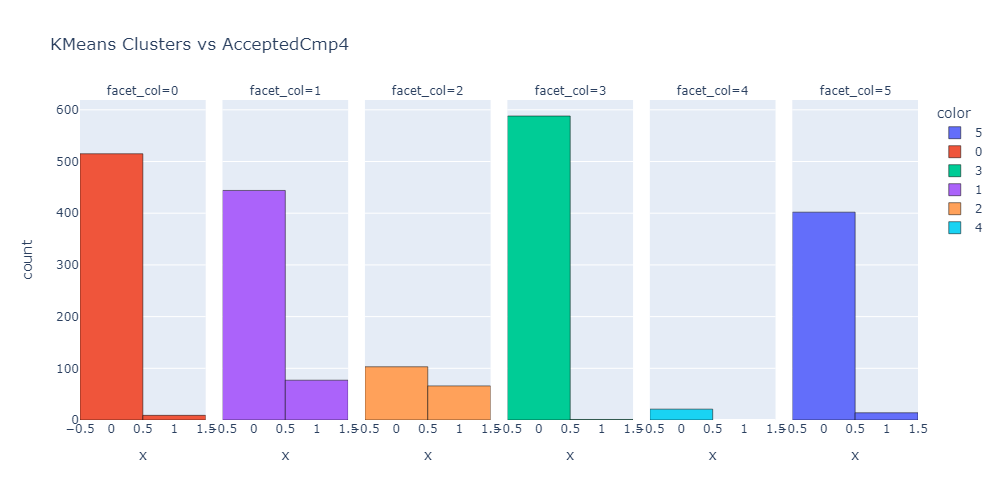

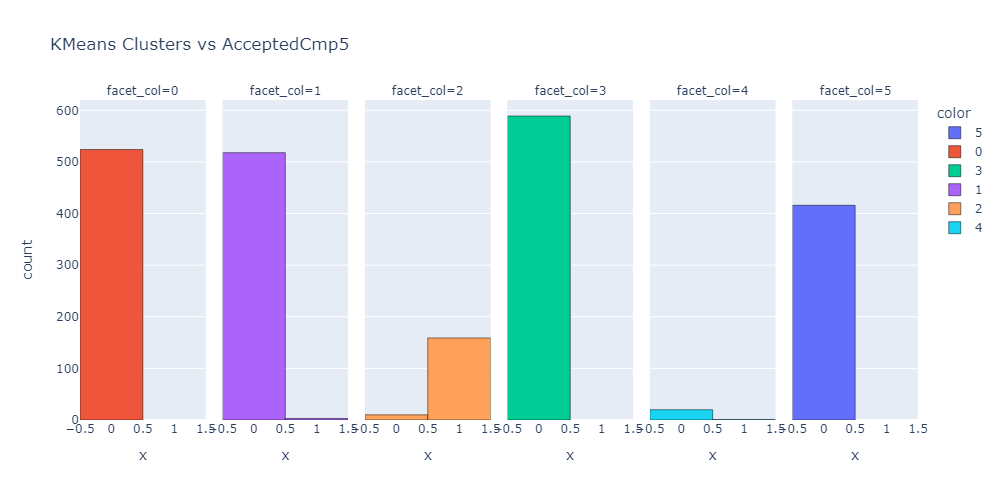

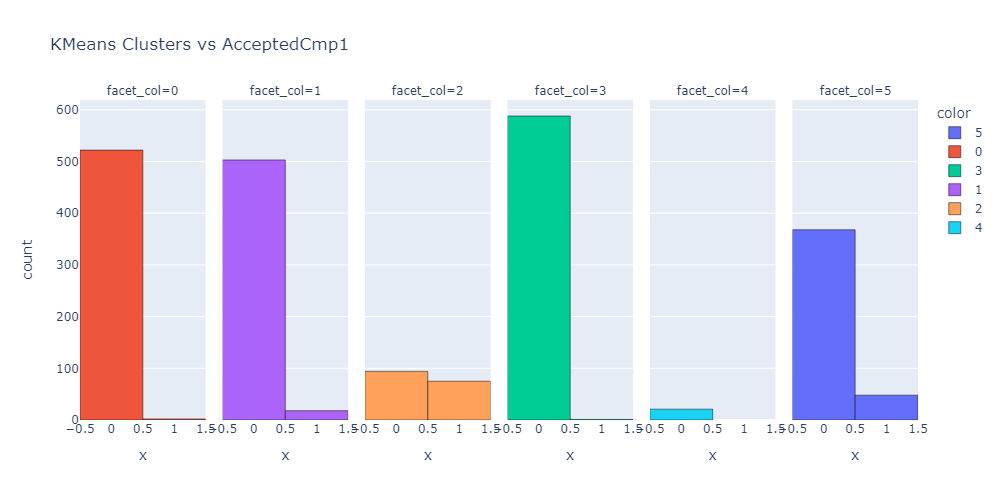

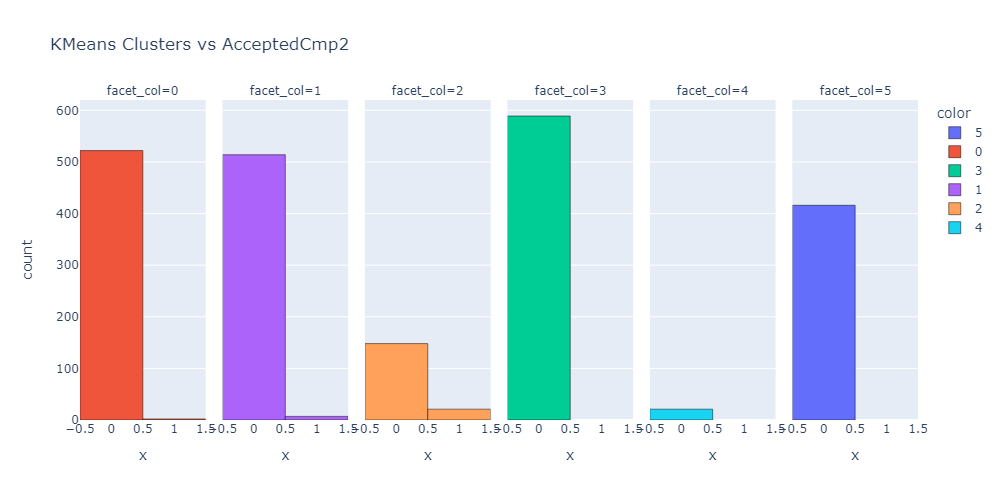

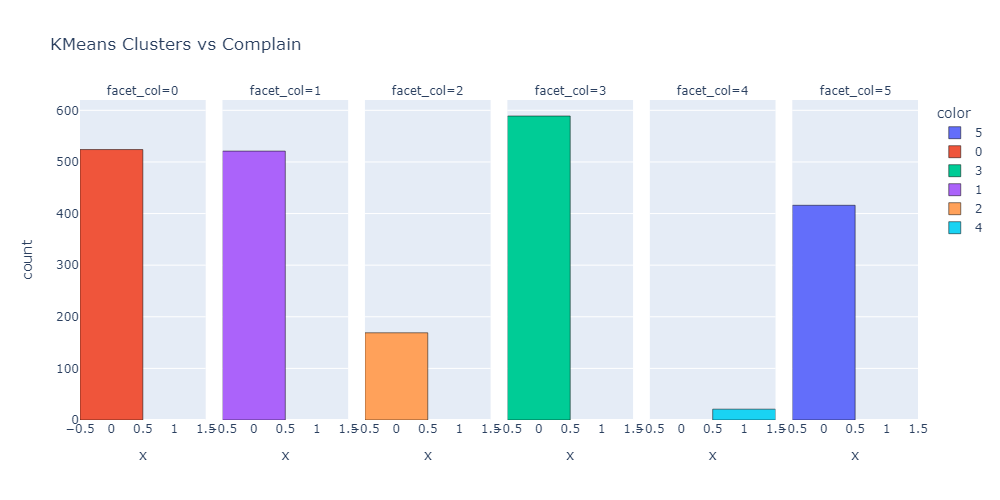

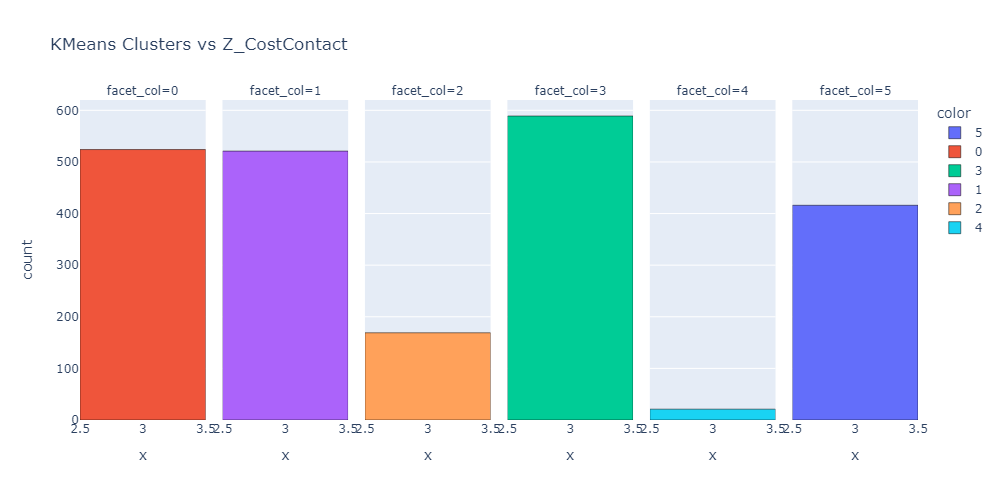

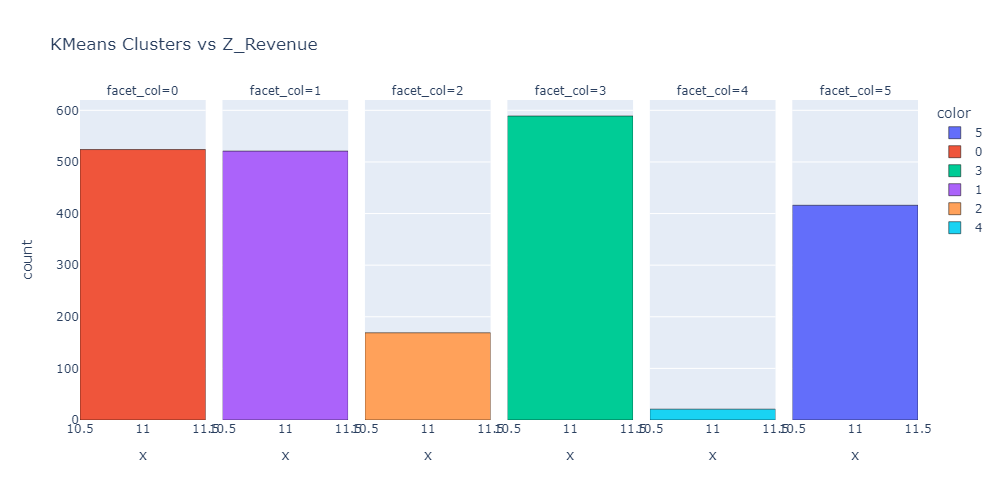

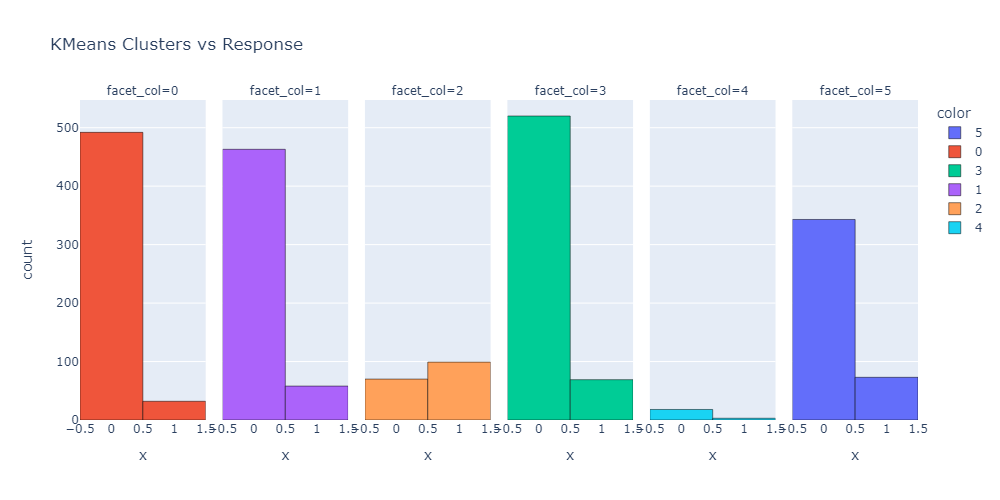

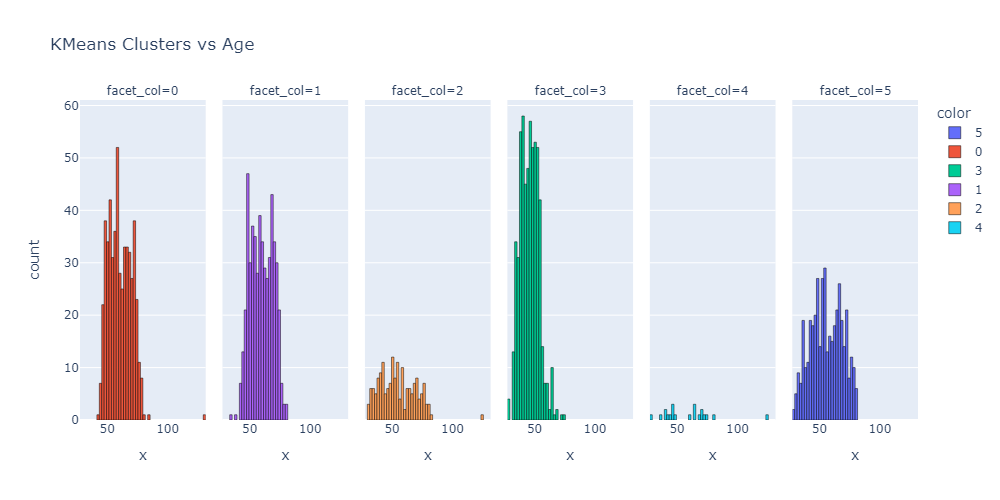

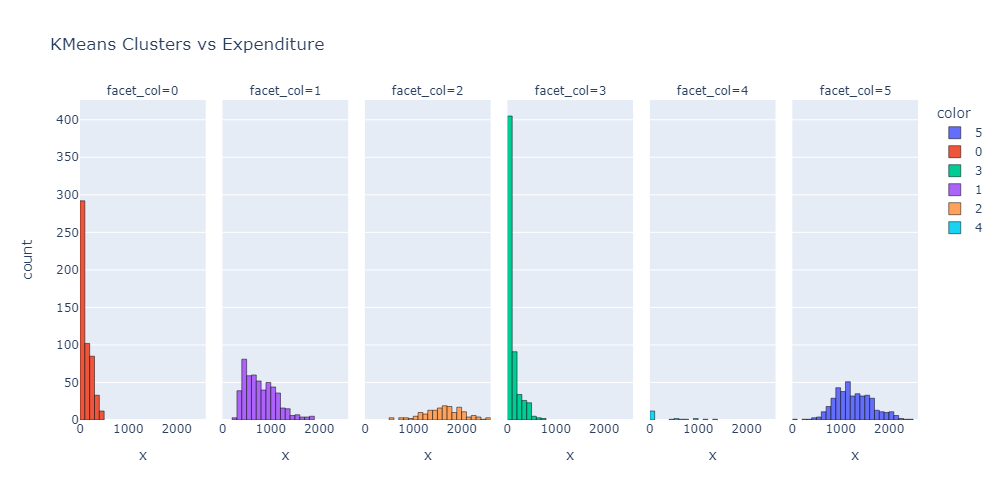

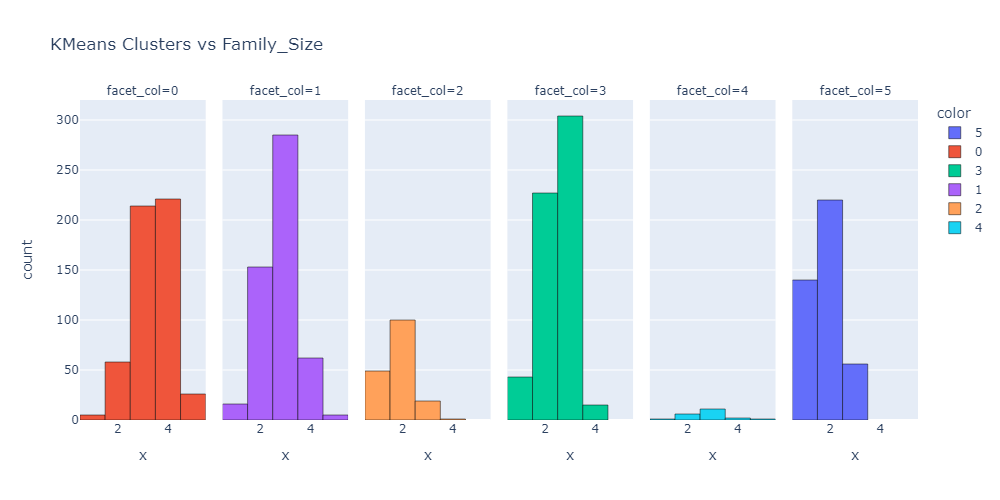

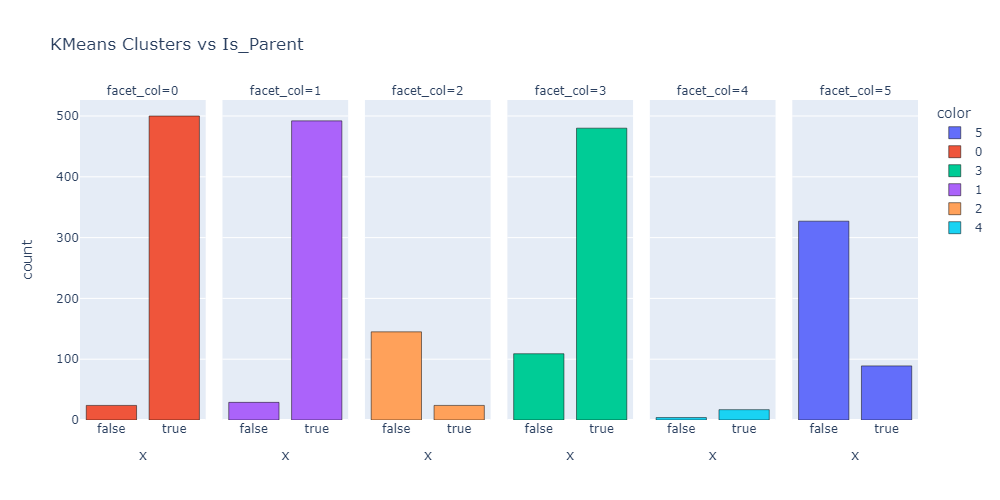

In [52]:
for col in columns:
    str = f'KMeans Clusters vs {col}'
    fig = px.histogram(x = data_new[col],
                  facet_col = data_new['Cluster_KM'],
                  color = data_new['Cluster_KM'],
                  category_orders={'facet_col': [0, 1, 2, 3, 4, 5]},
                  height = 500,
                  width = 1000,
                  title = str)
    fig.update_traces(marker_line_color = 'black', marker_line_width = 0.5)
    fig.show()

## Agglomerative Clusters

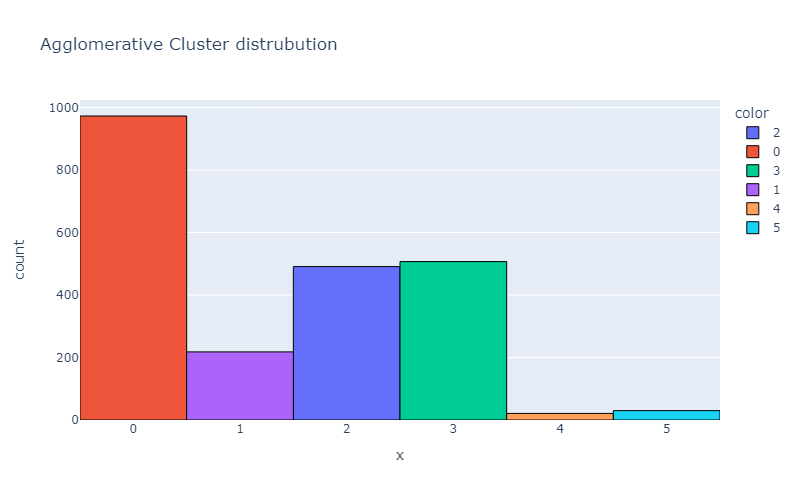

In [53]:
fig = px.histogram(x = data_new['Cluster_Agg'], 
                   height = 500,
                   width = 800,
                   color = data_new['Cluster_Agg'],
                  title = 'Agglomerative Cluster distrubution')
fig.update_traces(marker_line_color = 'black', marker_line_width = 1)
fig.show()

In [54]:
print('Agglomerative cluster distributions in percentage:\n')
for cluster in range(0, 6):
    total = (data_new['Cluster_Agg'] == cluster).sum()
    perc = (total/data_new.shape[0]) * 100
    str = f'Cluster {cluster}: {round(perc, 2)}%'
    print(str)

Agglomerative cluster distributions in percentage:

Cluster 0: 43.44%
Cluster 1: 9.73%
Cluster 2: 21.92%
Cluster 3: 22.63%
Cluster 4: 0.94%
Cluster 5: 1.34%


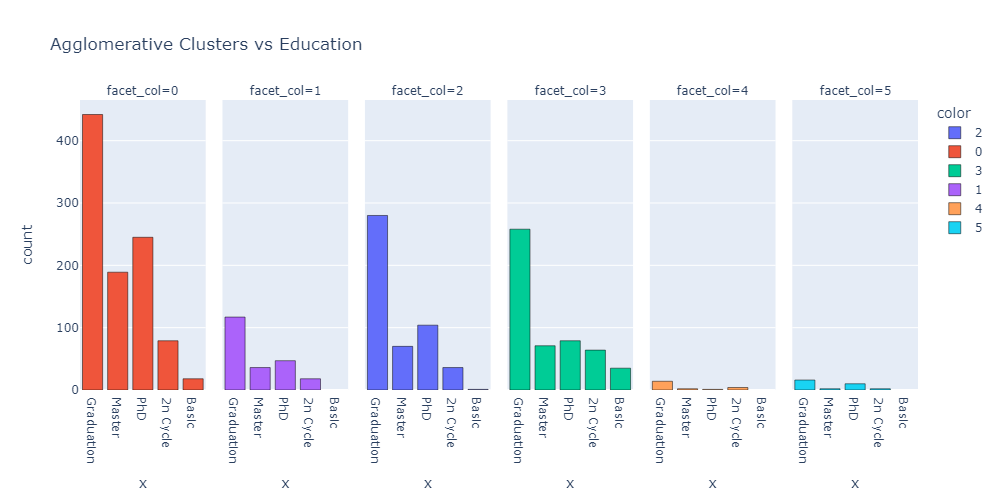

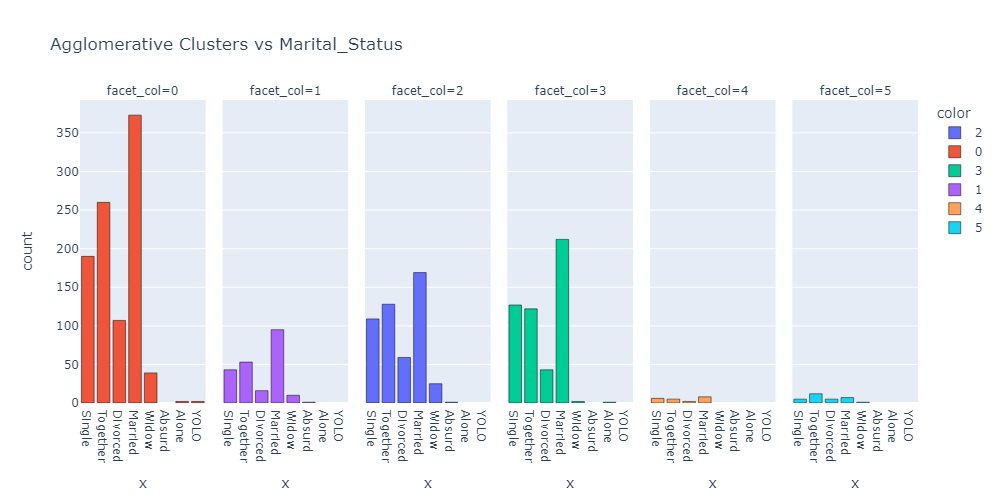

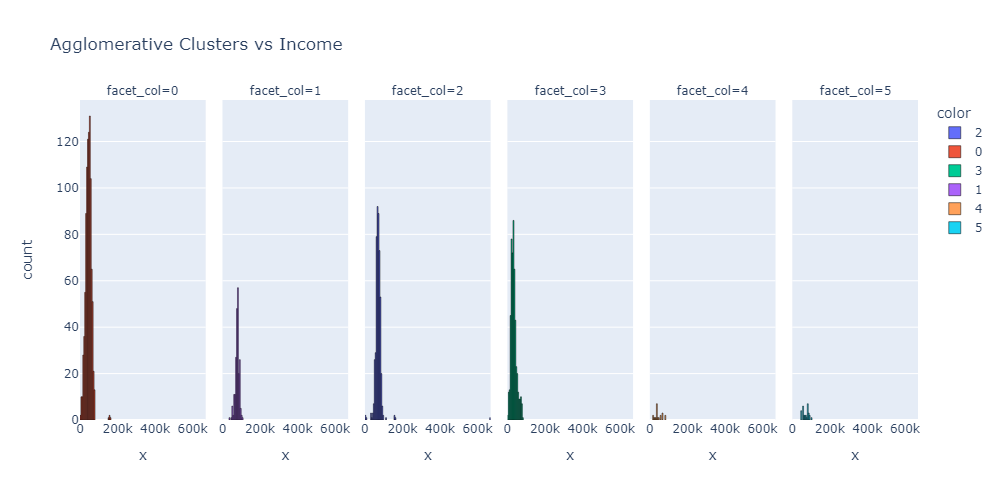

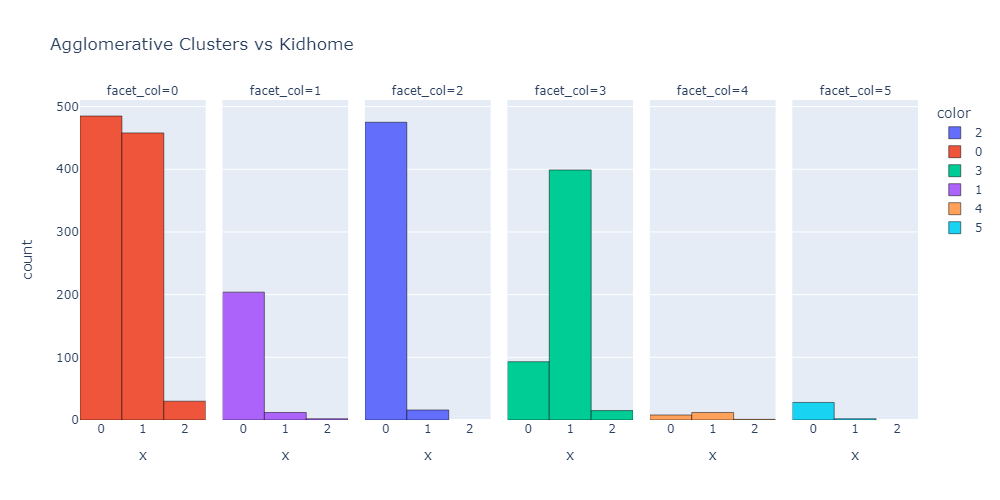

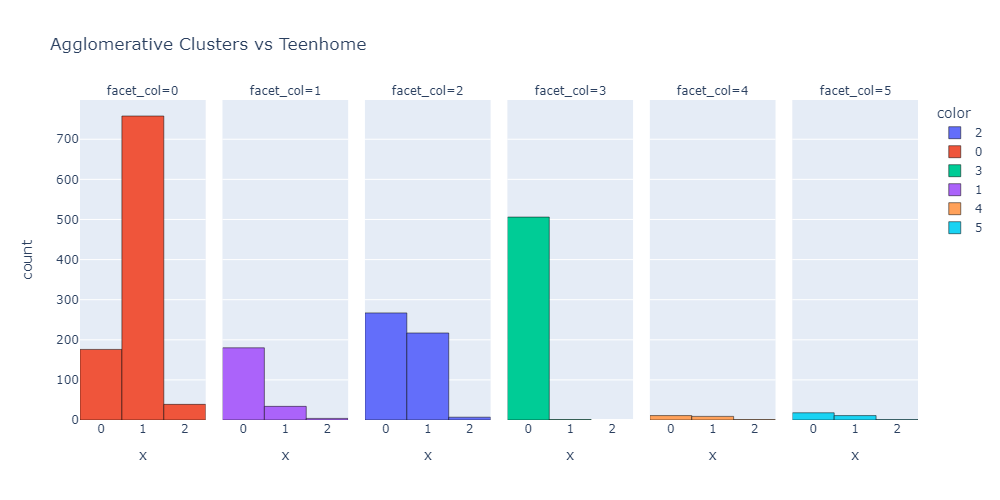

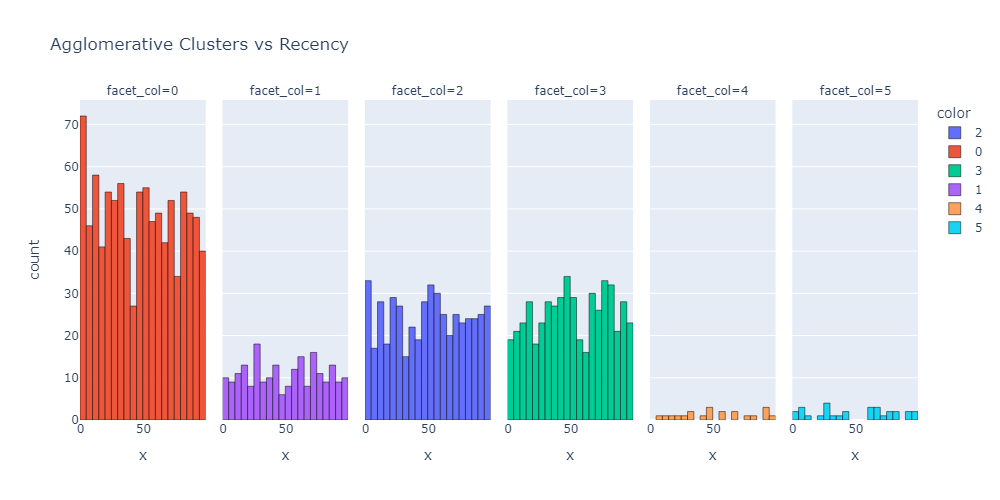

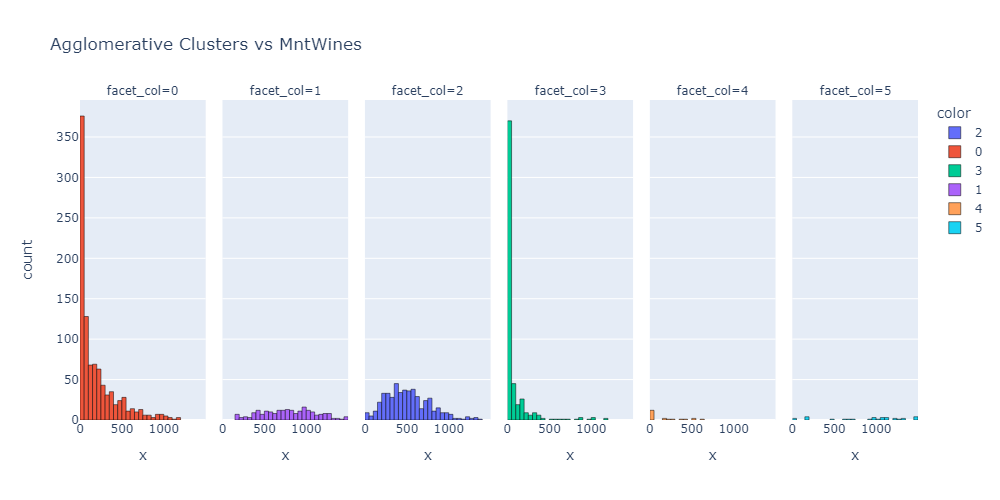

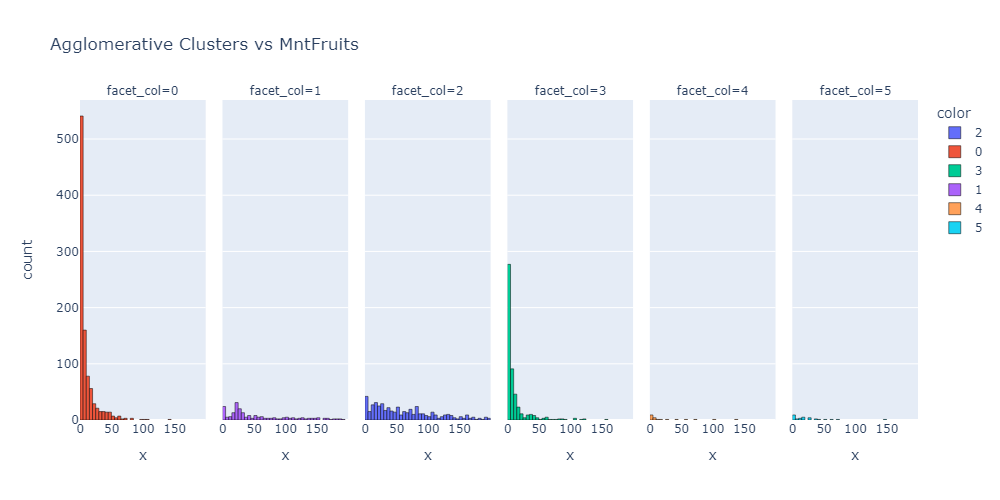

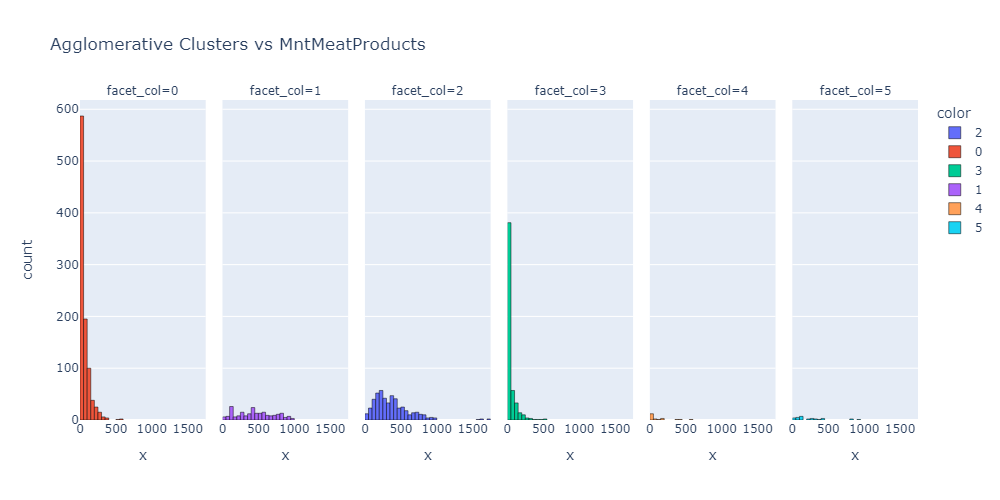

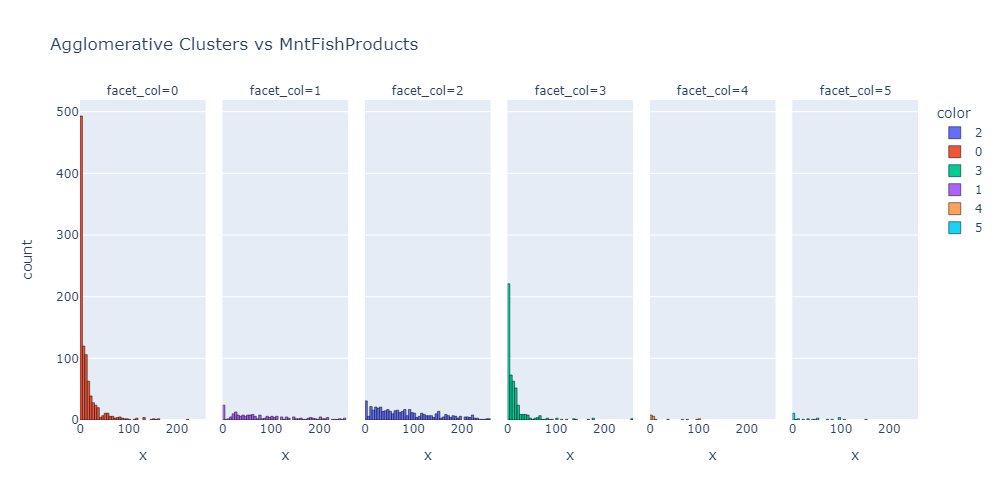

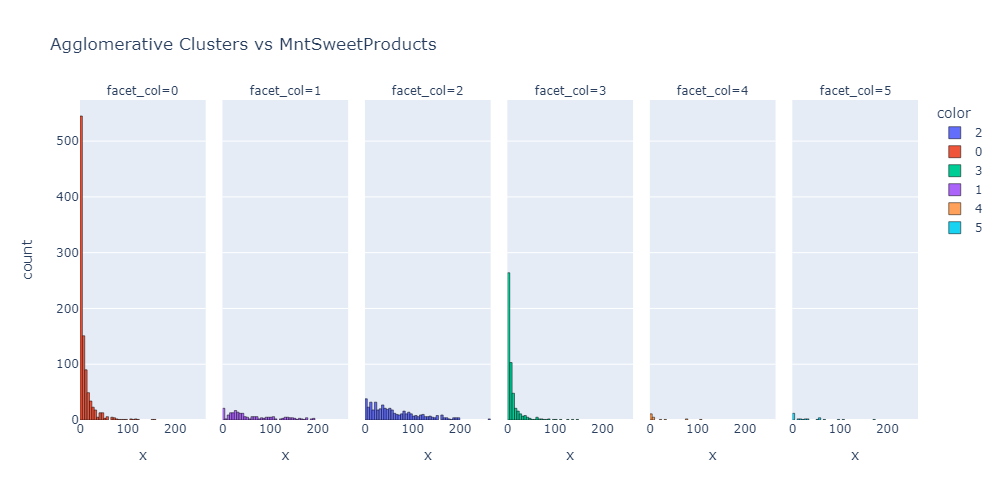

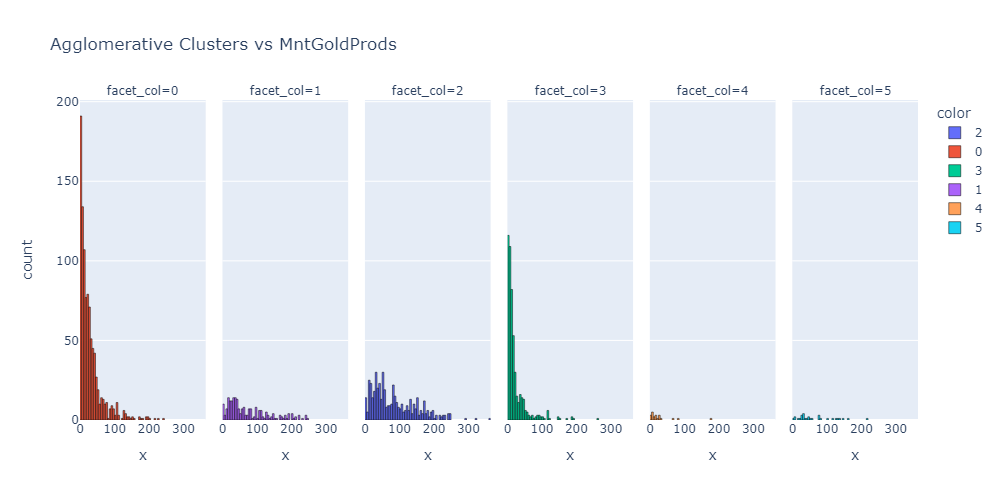

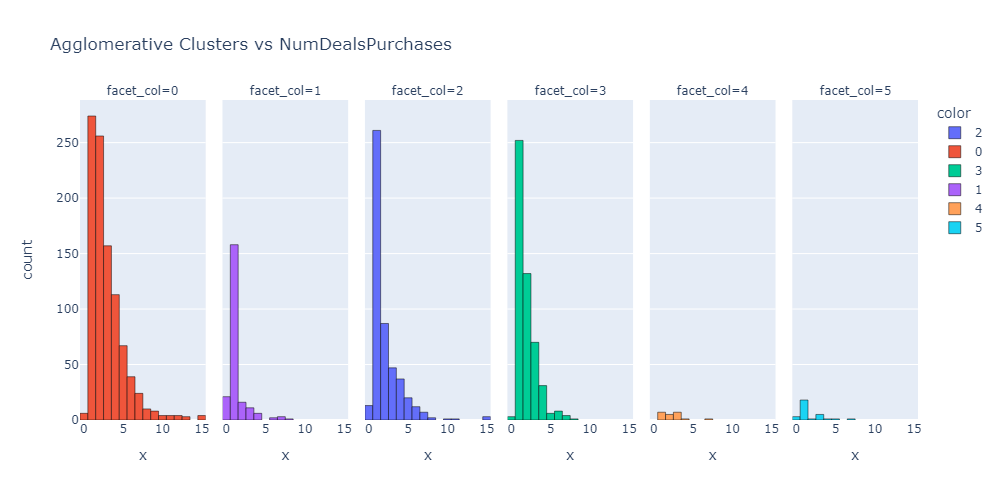

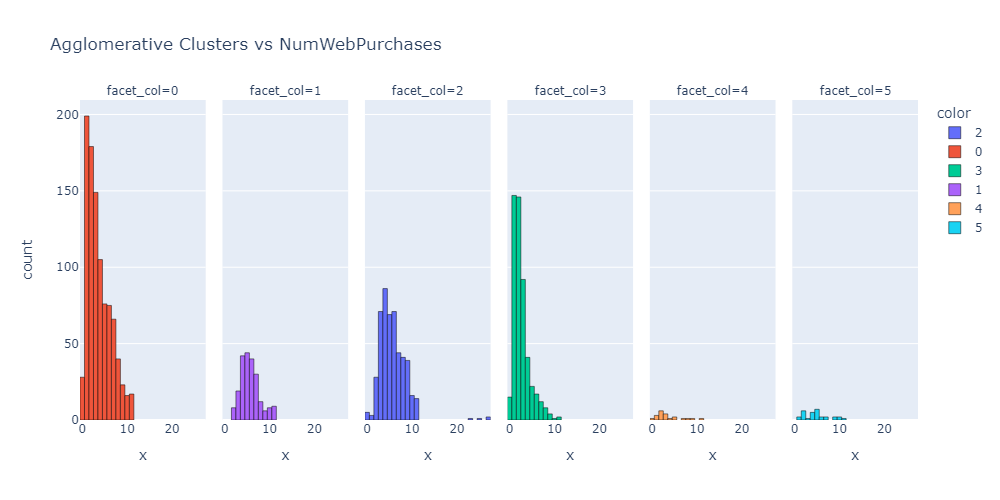

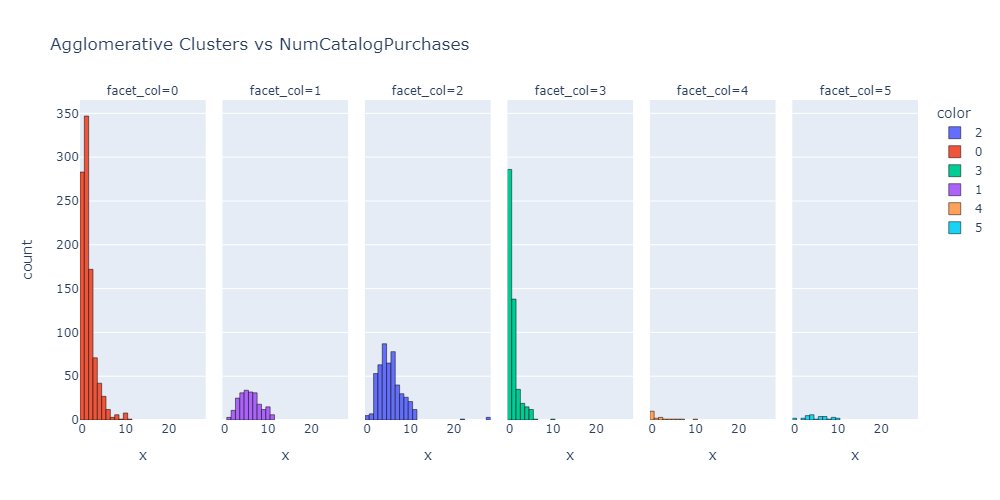

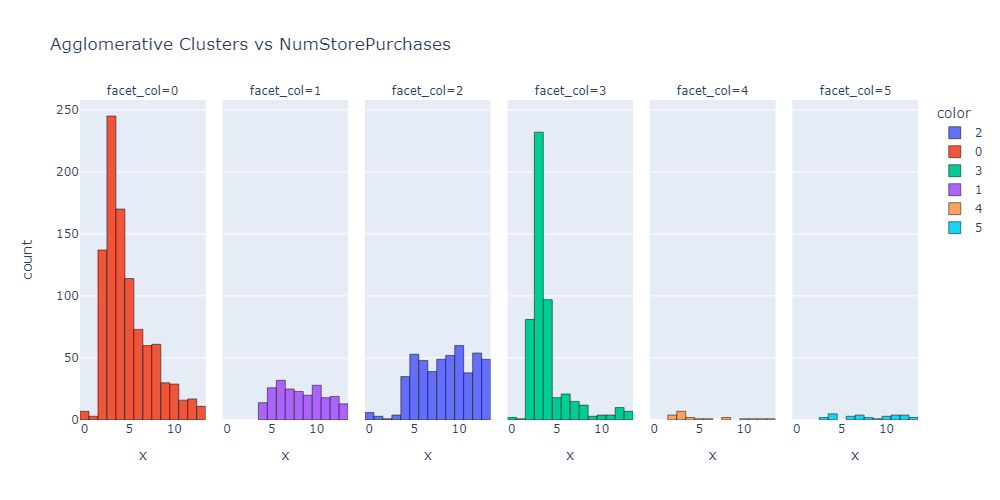

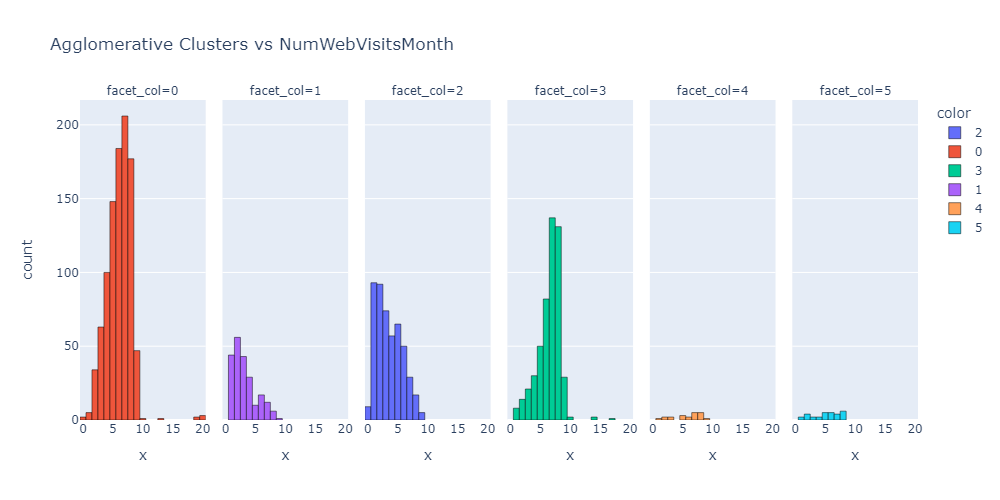

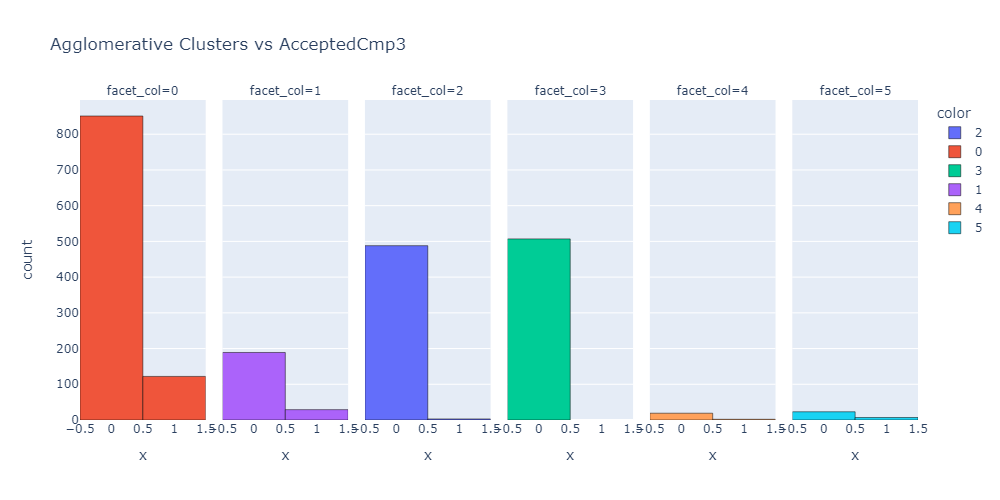

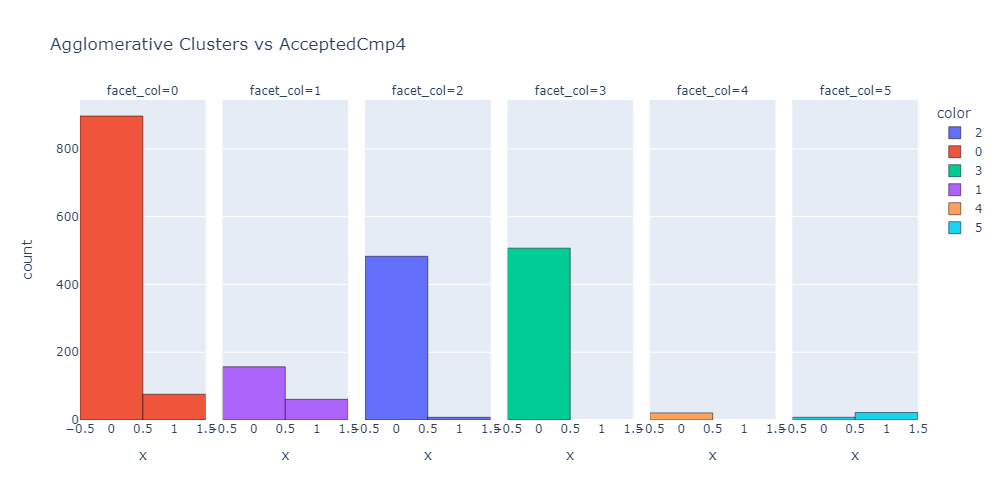

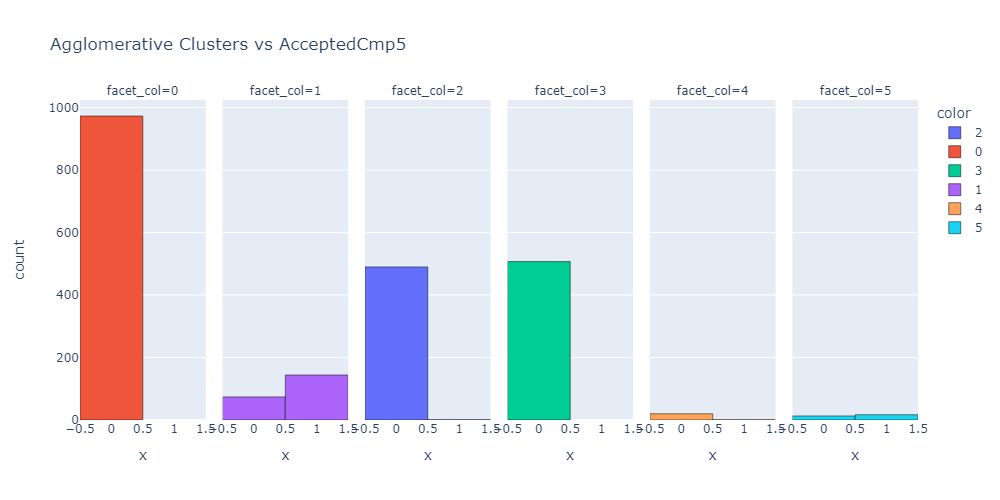

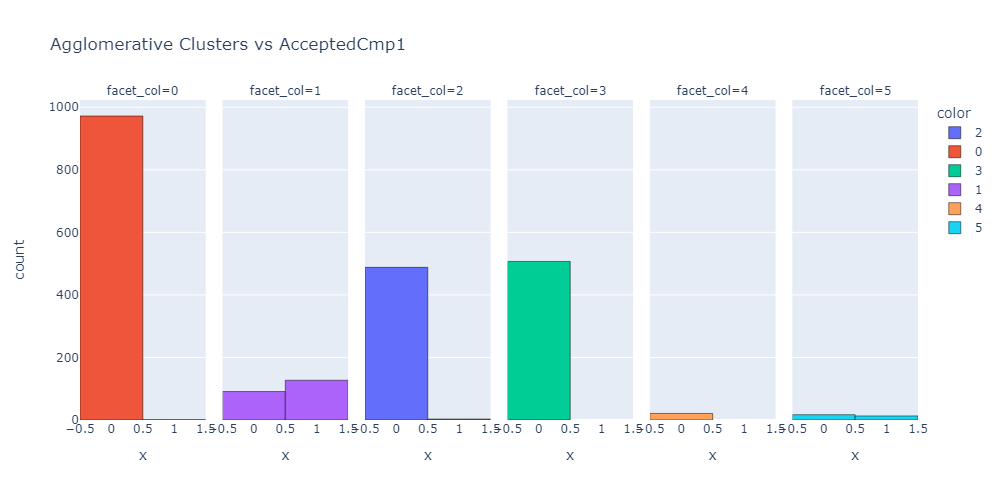

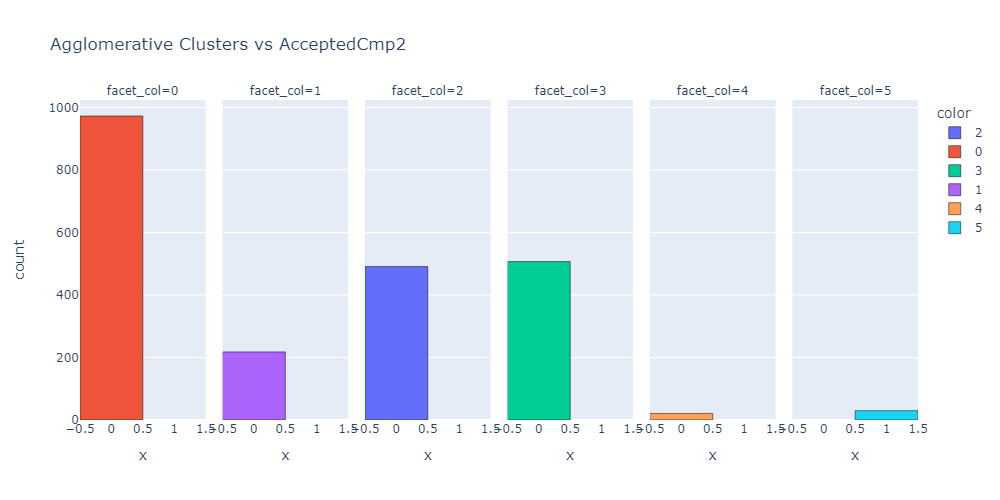

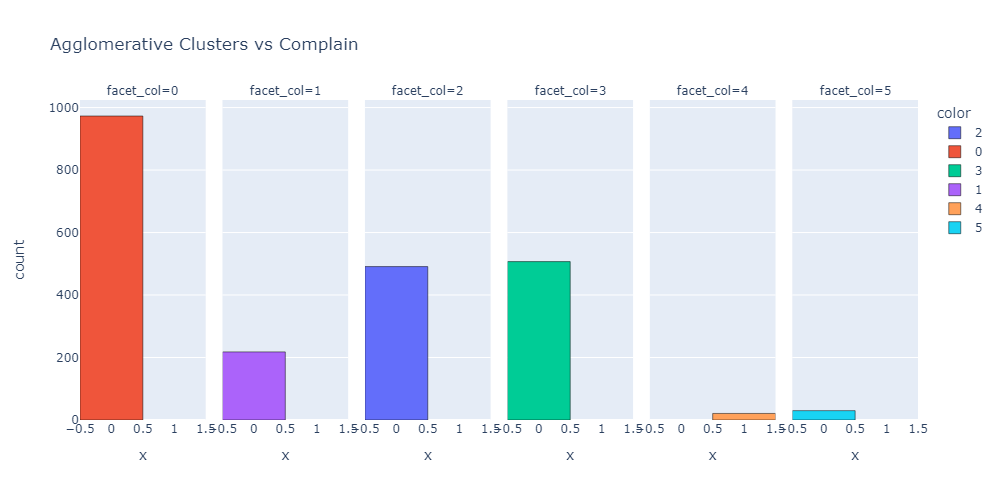

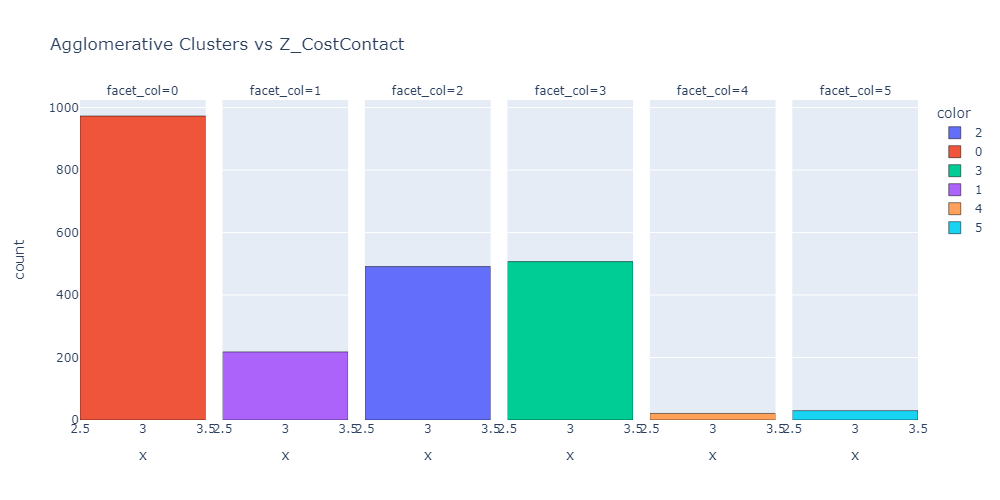

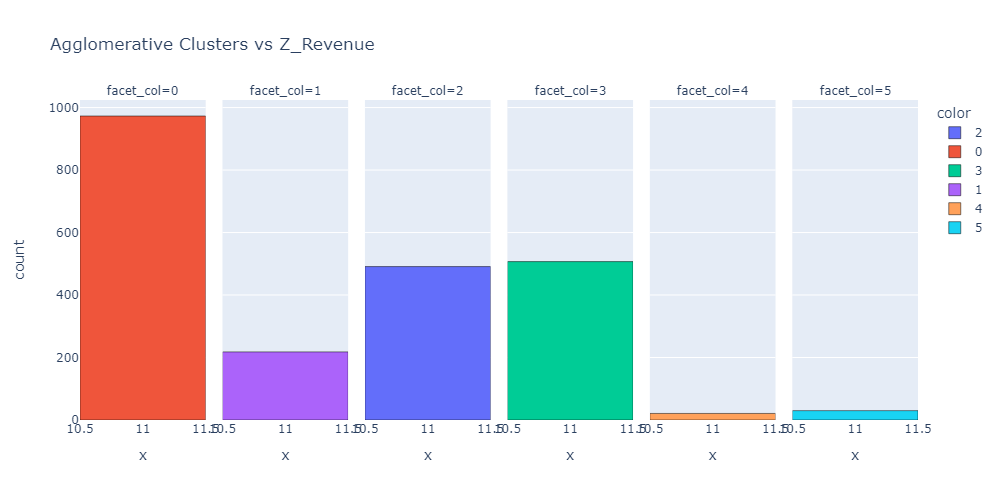

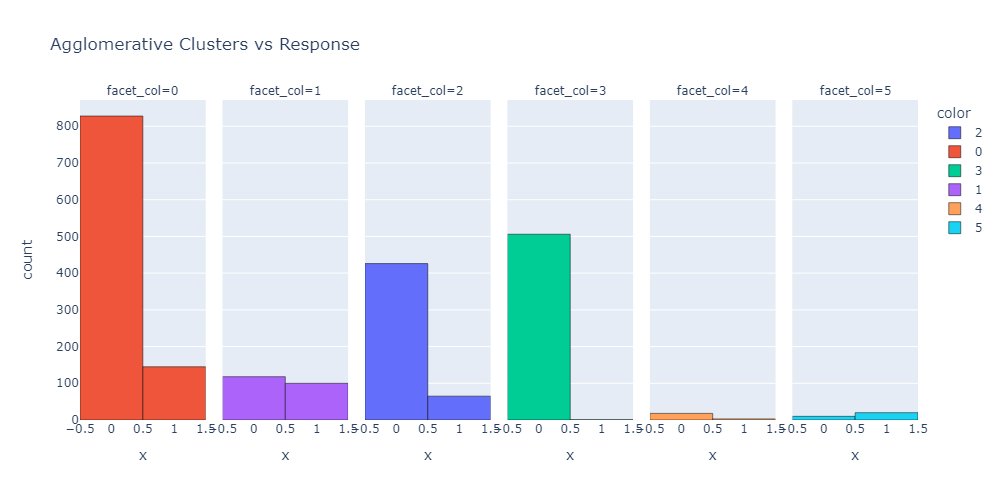

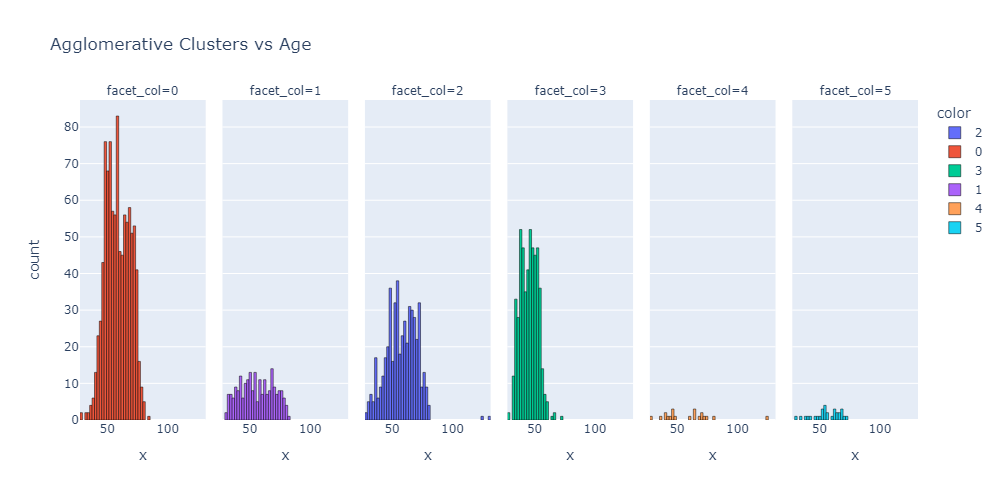

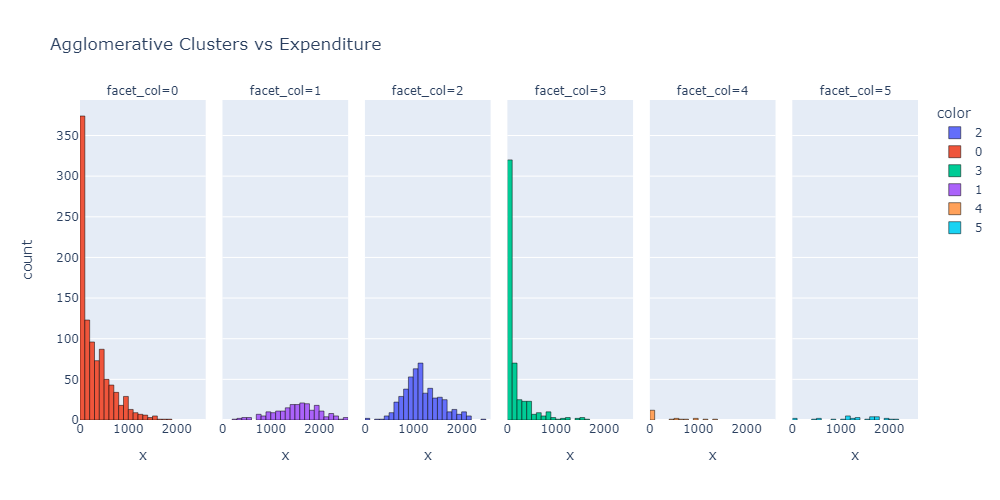

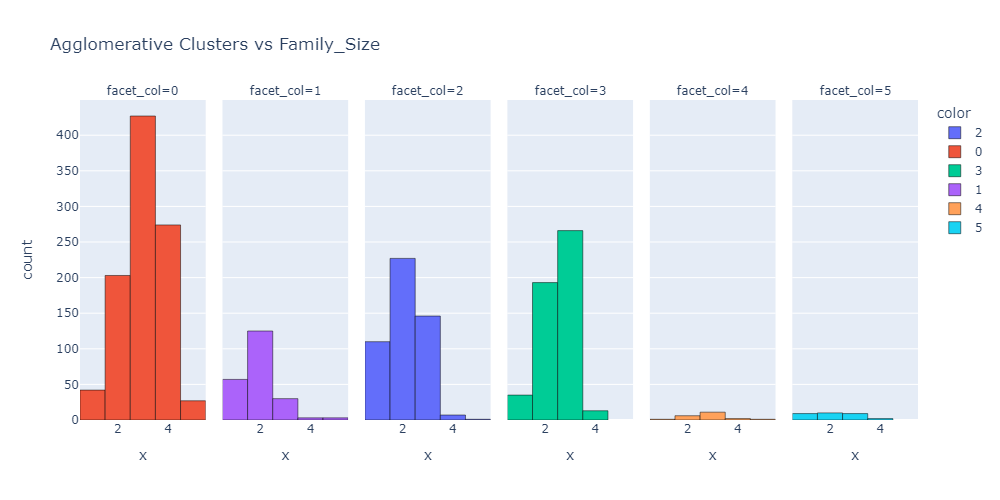

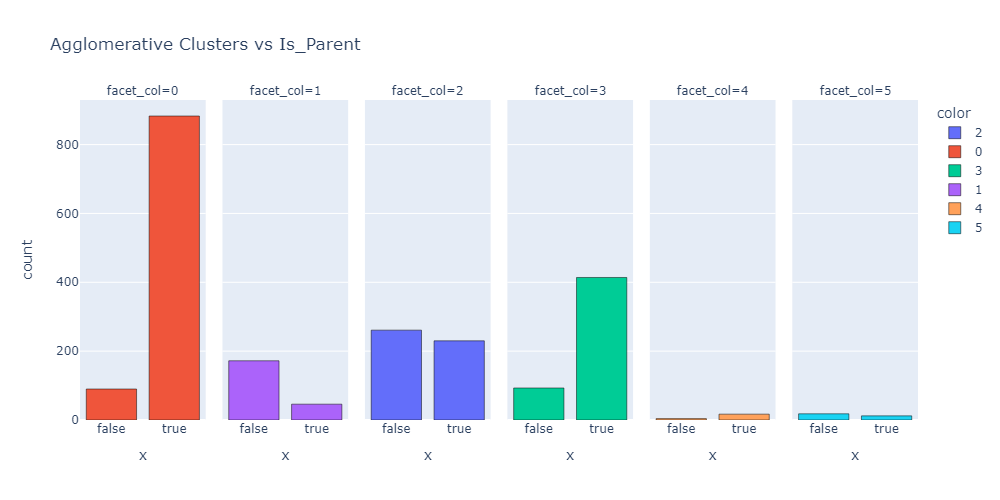

In [55]:
for col in columns:
    str = f'Agglomerative Clusters vs {col}'
    fig = px.histogram(x = data_new[col],
                  facet_col = data_new['Cluster_Agg'],
                  color = data_new['Cluster_Agg'],
                  category_orders={'facet_col': [0, 1, 2, 3, 4, 5]},
                  height = 500,
                  width = 1000,
                  title = str)
    fig.update_traces(marker_line_color = 'black', marker_line_width = 0.5)
    fig.show()

In [56]:
data_new[['Cluster_KM', 'Cluster_Agg']].describe().T

,count,mean,std,min,25%,50%,75%,max
Cluster_KM,2240.0,2.138393,1.767037,0.0,1.0,2.0,3.0,5.0
Cluster_Agg,2240.0,1.319196,1.325325,0.0,0.0,1.0,2.0,5.0


## Distribution of KMeans clusters vs Agglomerative clusters 🔍

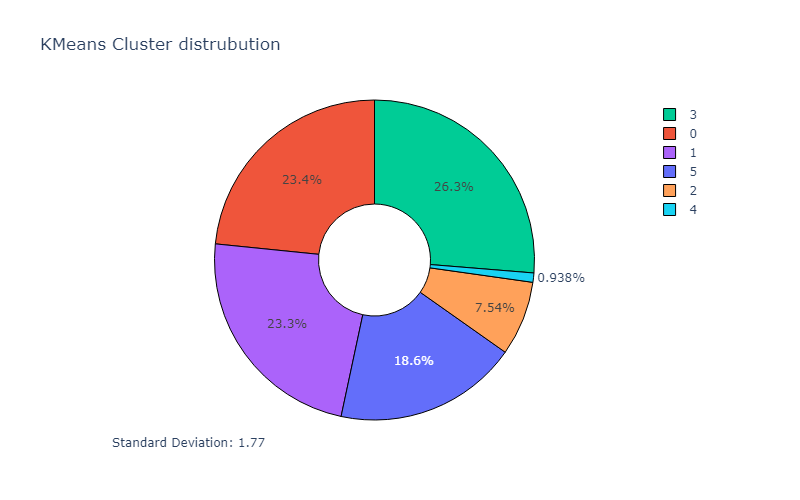

K-Means cluster distributions in percentage:

Cluster 0: 23.39%
Cluster 1: 23.26%
Cluster 2: 7.54%
Cluster 3: 26.29%
Cluster 4: 0.94%
Cluster 5: 18.57%
Standard Deviation: 1.77


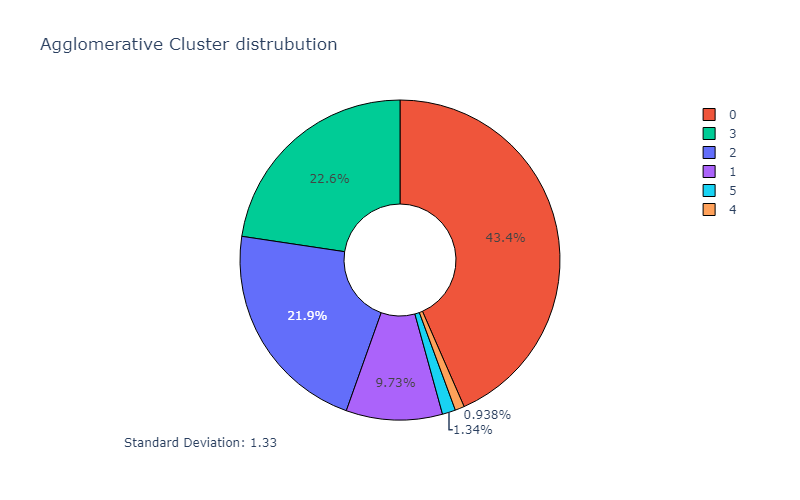

Agglomerative cluster distributions in percentage:

Cluster 0: 43.44%
Cluster 1: 9.73%
Cluster 2: 21.92%
Cluster 3: 22.63%
Cluster 4: 0.94%
Cluster 5: 1.34%
Standard Deviation: 1.33


In [57]:
std_dev_km = f'Standard Deviation: {round(data_new['Cluster_KM'].std(), 2)}'
std_dev_agg = f'Standard Deviation: {round(data_new['Cluster_Agg'].std(), 2)}'

fig = px.pie(names = data_new['Cluster_KM'], 
                   height = 500,
                   width = 800,
                   hole = 0.35,
                   color = data_new['Cluster_KM'],
                  title = 'KMeans Cluster distrubution')
fig.update_traces(marker_line_color = 'black', marker_line_width = 1)

fig.add_annotation(text=std_dev_km, 
                    align='left',
                    showarrow=False,
                    xref='paper',
                    yref='paper',
                    x=0,
                    y= (-0.1))
fig.show()

print('K-Means cluster distributions in percentage:\n')
for cluster in range(0, 6):
    total = (data_new['Cluster_KM'] == cluster).sum()
    perc = (total/data_new.shape[0]) * 100
    str = f'Cluster {cluster}: {round(perc, 2)}%'
    print(str)
print(std_dev_km)

fig = px.pie(names = data_new['Cluster_Agg'], 
                   height = 500,
                   width = 800,
                   hole = 0.35,
                   color = data_new['Cluster_Agg'],
                  title = 'Agglomerative Cluster distrubution')

fig.update_traces(marker_line_color = 'black', marker_line_width = 1)

fig.add_annotation(text=std_dev_agg, 
                    align='left',
                    showarrow=False,
                    xref='paper',
                    yref='paper',
                    x=0,
                    y= (-0.1))
fig.show()

print('Agglomerative cluster distributions in percentage:\n')
for cluster in range(0, 6):
    total = (data_new['Cluster_Agg'] == cluster).sum()
    perc = (total/data_new.shape[0]) * 100
    str = f'Cluster {cluster}: {round(perc, 2)}%'
    print(str)
print(std_dev_agg)

## Despite Agglomerative clustering having a _smaller standard deviation_, the visualization shows that there is a _large imbalance_ in the clusters generated by it. 📉<br><br>_K-Means clustering_, on the other hand, generates more _balanced clusters_ despite having a slightly larger standard deviation. ⚖️
### Since we have to generate targeted marketing strategies, having balanced clusters will help us more in generating relevant strategies for the customers. <br>
### Hence **we will use K-Means clustering** to analyze the clusters. ✅


# Descriptive analytics for each cluster 🛠️

## 🔴 Cluster 0 / RED 🔴

In [58]:
data_new[data_new['Cluster_KM'] == 0].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Year_Birth,524.0,NaN,NaN,NaN,1963.28626,9.50486,1893.0,1956.0,1965.0,1971.0,1981.0
Education,524,5,Graduation,236,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,524,6,Married,197,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,524.0,NaN,NaN,NaN,42747.671297,14542.27666,4023.0,34624.75,42571.5,50546.25,162397.0
Kidhome,524.0,NaN,NaN,NaN,0.717557,0.563719,0.0,0.0,1.0,1.0,2.0
Teenhome,524.0,NaN,NaN,NaN,0.990458,0.293174,0.0,1.0,1.0,1.0,2.0
Recency,524.0,NaN,NaN,NaN,50.188931,29.208956,0.0,25.0,50.0,76.25,99.0
MntWines,524.0,NaN,NaN,NaN,70.566794,69.967524,0.0,18.0,43.5,102.0,406.0
MntFruits,524.0,NaN,NaN,NaN,4.389313,8.307726,0.0,0.0,1.0,5.0,70.0
MntMeatProducts,524.0,NaN,NaN,NaN,26.326336,25.974513,1.0,8.0,16.0,37.0,147.0


## 🟣 Cluster 1 / PURPLE 🟣

In [59]:
data_new[data_new['Cluster_KM'] == 1].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Year_Birth,521.0,NaN,NaN,NaN,1964.117083,9.291007,1943.0,1956.0,1964.0,1972.0,1989.0
Education,521,5,Graduation,249,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,521,7,Married,208,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,521.0,NaN,NaN,NaN,59299.774488,10612.760256,4428.0,53172.0,59462.0,65695.0,113734.0
Kidhome,521.0,NaN,NaN,NaN,0.170825,0.381789,0.0,0.0,0.0,0.0,2.0
Teenhome,521.0,NaN,NaN,NaN,0.961612,0.380365,0.0,1.0,1.0,1.0,2.0
Recency,521.0,NaN,NaN,NaN,47.324376,28.545921,0.0,23.0,48.0,70.0,99.0
MntWines,521.0,NaN,NaN,NaN,503.491363,270.901019,6.0,297.0,457.0,654.0,1396.0
MntFruits,521.0,NaN,NaN,NaN,22.992322,25.910273,0.0,5.0,14.0,35.0,142.0
MntMeatProducts,521.0,NaN,NaN,NaN,145.74856,100.682556,3.0,71.0,124.0,196.0,650.0


## 🟤 Cluster 2 / BROWN 🟤

In [60]:
data_new[data_new['Cluster_KM'] == 2].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Year_Birth,169.0,NaN,NaN,NaN,1969.307692,14.83641,1899.0,1958.0,1971.0,1982.0,1994.0
Education,169,4,Graduation,87,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,169,6,Married,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,169.0,NaN,NaN,NaN,81456.482265,9852.875197,48192.0,76982.0,82332.0,87771.0,105471.0
Kidhome,169.0,NaN,NaN,NaN,0.04142,0.199852,0.0,0.0,0.0,0.0,1.0
Teenhome,169.0,NaN,NaN,NaN,0.118343,0.358844,0.0,0.0,0.0,0.0,2.0
Recency,169.0,NaN,NaN,NaN,49.585799,29.115023,1.0,24.0,53.0,75.0,99.0
MntWines,169.0,NaN,NaN,NaN,877.461538,328.986756,152.0,675.0,901.0,1076.0,1493.0
MntFruits,169.0,NaN,NaN,NaN,56.946746,49.700204,0.0,21.0,34.0,86.0,185.0
MntMeatProducts,169.0,NaN,NaN,NaN,469.573964,259.348283,48.0,269.0,445.0,694.0,974.0


## 🟢 Cluster 3 / GREEN 🟢

In [61]:
data_new[data_new['Cluster_KM'] == 3].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Year_Birth,589.0,NaN,NaN,NaN,1978.234295,7.606575,1950.0,1973.0,1978.0,1984.0,1996.0
Education,589,5,Graduation,304,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,589,6,Married,242,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,589.0,NaN,NaN,NaN,30578.425311,12340.871035,1730.0,22634.0,30168.0,37717.0,153924.0
Kidhome,589.0,NaN,NaN,NaN,0.833616,0.439725,0.0,1.0,1.0,1.0,2.0
Teenhome,589.0,NaN,NaN,NaN,0.018676,0.135492,0.0,0.0,0.0,0.0,1.0
Recency,589.0,NaN,NaN,NaN,48.887946,28.558587,0.0,24.0,48.0,75.0,99.0
MntWines,589.0,NaN,NaN,NaN,38.468591,62.024554,0.0,5.0,14.0,38.0,393.0
MntFruits,589.0,NaN,NaN,NaN,7.125637,11.045877,0.0,1.0,3.0,8.0,123.0
MntMeatProducts,589.0,NaN,NaN,NaN,29.572156,36.803306,0.0,8.0,15.0,30.0,235.0


## 💧 Cluster 4 / CYAN 💧

In [62]:
data_new[data_new['Cluster_KM'] == 4].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Year_Birth,21.0,NaN,NaN,NaN,1965.095238,20.916273,1900.0,1954.0,1964.0,1979.0,1995.0
Education,21,4,Graduation,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,21,4,Married,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,21.0,NaN,NaN,NaN,45242.285714,19223.158027,15716.0,36640.0,38998.0,58113.0,83257.0
Kidhome,21.0,NaN,NaN,NaN,0.666667,0.57735,0.0,0.0,1.0,1.0,2.0
Teenhome,21.0,NaN,NaN,NaN,0.52381,0.601585,0.0,0.0,0.0,1.0,2.0
Recency,21.0,NaN,NaN,NaN,53.047619,28.522756,8.0,31.0,49.0,77.0,99.0
MntWines,21.0,NaN,NaN,NaN,169.0,208.770209,1.0,16.0,34.0,290.0,629.0
MntFruits,21.0,NaN,NaN,NaN,24.190476,38.367459,0.0,1.0,6.0,27.0,137.0
MntMeatProducts,21.0,NaN,NaN,NaN,112.47619,159.926114,1.0,14.0,30.0,169.0,590.0


## 🔵 Cluster 5 / BLUE 🔵

In [63]:
data_new[data_new['Cluster_KM'] == 5].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Year_Birth,416.0,NaN,NaN,NaN,1968.264423,12.935513,1943.0,1958.0,1969.0,1978.0,1995.0
Education,416,5,Graduation,237,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,416,6,Married,139,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,416.0,NaN,NaN,NaN,74547.968159,31787.17713,2447.0,67418.5,73449.0,79833.5,666666.0
Kidhome,416.0,NaN,NaN,NaN,0.043269,0.203708,0.0,0.0,0.0,0.0,1.0
Teenhome,416.0,NaN,NaN,NaN,0.173077,0.385078,0.0,0.0,0.0,0.0,2.0
Recency,416.0,NaN,NaN,NaN,49.90625,29.73827,0.0,23.75,52.0,75.0,99.0
MntWines,416.0,NaN,NaN,NaN,497.649038,265.527412,1.0,292.75,455.0,671.75,1315.0
MntFruits,416.0,NaN,NaN,NaN,72.858173,51.628764,0.0,28.0,63.5,108.0,199.0
MntMeatProducts,416.0,NaN,NaN,NaN,444.951923,252.395134,3.0,262.25,408.5,573.0,1725.0


# Inference 📝

## From the above clusters, we can see that:

### 🔴 Cluster 0 / RED 🔴
- **Education**: Graduates or PhD
- **Marital Status**: Married or Together
- **Income**: 34k - 50k
- **Are Parents**: YES
- **Family Size**: 3-4, mostly have 1 kid and 1 teen home
- **Top Item**: Wine
- **Method of Purchase**: Store
- **Web Visits**: 5-7 [moderate]
- **Age**: 53 - 68
- **Expenditure**: 40-200 
##### **Strategy for cluster 0/red:** 
1. Offer discounts/deals on the purchase of other products such as meat or gold. 
2. Offer exclusive discounts for web purchases.

### 🟣 Cluster 1 / PURPLE 🟣
* **Education**: Graduates or PhD
* **Marital Status**: Married or Together
* **Income**: 53k - 65k
* **Are Parents**: YES
* **Family Size**: 2-3, mostly have 1 teen home
* **Top Item**: Wine, Meat, Gold
* **Method of Purchase**: Store, Web, Catalog with Deals
* **Web Visits**: 4-7 [moderate]
* **Age**: 52-68
* **Expenditure**: 500-1000
##### **Strategy for cluster 1/purple:** 
1. Offer deals/reward points on the purchase of top-shelf/high quality wines. 
2. Offer catalog coupons/deals which they can present at the store. 
3. Consider offering discounts for web purchases.

### 🟤 Cluster 2 / BROWN 🟤
- **Education**: Graduate or PhD
- **Marital Status**: Married or Together
- **Income**: 76k - 87k
- **Are Parents**: NO
- **Family Size**: 1-2, no kids
- **Top Item**: Wine, Meat, Gold
- **Method of Purchase**: Web
- **Web Visits**: 2-4 [low]
- **Age**: 42-66
- **Expenditure**: 1300-1900
- **Note**: Only cluster which accepted offer in last campaign
##### Strategy for cluster 3/brown:
1. Consider offering deals instead of discounts as this is a high income/high expenditure group, and they had a positive response to the previous campaingn. 
2. Consider offering exclusive deals or discount codes for web purchases to drive the web traffic up.
3. Offer reward points on the purchase of high quality wine or gold above _n_ grams.

### 🟢 Cluster 3 / GREEN 🟢
* **Education**: Graduate or Master
* **Marital Status**: Married or Single
* **Income**: 22k - 37k
* **Are Parents**: YES
* **Family Size**: 2-3, have 1 kid and no teen home
* **Top Item**: Wine, Meat, Gold
* **Method of Purchase**: Store, Web, Deals
* **Web Visits**: 6-8 [high]
* **Age**: 40-51
* **Expenditure**: 40-120
##### **Strategy for cluster 3/green:**
1. Offer heavy discounts.
2. Offer deals on wine + meat.
3. Offer web-exclusive deals or a implement a reward point system.

### 💧 Cluster 4 / CYAN 💧
- **Education**: Graduate or 2nd Cycle
- **Marital Status**: Married or Single
- **Income**: 36k-58k
- **Are Parents**: YES
- **Family Size**: 2-3, have 1 kid and no teen
- **Top Item**: Wine, Meat, Gold
- **Method of Purchase**: Store, Web, Deals
- **Web Visits**: 5-8 [high]
- **Age**: 45-70
- **Expenditure**: 50-630
##### **Strategy for cluster 4/cyan:** 
1. Offer deals on wine and meat.
2. Offer reward points system for the purchase of gold.
3. Offer web-exclusive discounts.

### 🔵 Cluster 5 / BLUE 🔵
* **Education**: Graduate or PhD
* **Marital Status**: Married or Single
* **Income**: 64k - 80k
* **Are Parents**: NO
* **Family Size**: 1-2, no kids no teens
* **Top Item**: Wine, Meat, Fish, Gold
* **Method of Purchase**: Store, Catalog
* **Web Visits**: 1-4 [low]
* **Age**: 46-66
* **Expenditure**: 980-1500
##### **Strategy for cluster 5/blue:** 
1. Offer web exclusive limited time deals to drive the web traffic up.
2. Implement a catalog-based coupon campaign where customers can bring coupon cut outs to the store to get deals.
3. Offer reward points on the purchase of top-shelf wine and above _n_ grams of gold.


### Wine, meat and gold are the highest selling products across all customers. <br>The store can consider giving a group deal or a _buy one get one_ deal on these products.

# <center>🎉The End🎉</center>
## Thank you for going through my notebook! 😄

### In this notebook, we learnt how to segregate customers via the use of various clustering algorithms.<br><br> We performed:

#### 1. *Exploratory Data Analysis*: to gain a general high-level understanding of the data.<br> 2. *Feature engineering*: to generate additional relevant features.<br> 3. *Principal Component Analysis (PCA)*: to decompose the data into a lower-dimensional feature space which still retains 95% of the variance.<br> 4. *Clustering via KMeans, Agglomerative Hierarchical Clustering, and DBSCAN*: and did more data visualizations to gain a lower level understanding of the data.<br> 5. *Optuna*: Used optuna to find the best hyperparameters for DBSCAN.<br> 6. *Analysis of clusters*: Visualized the feature distribution within the clusters, along with the distribution of the clusters themselfes.<br> 7. *Descriptive analysis of the clusters*: Dove into the numbers for each clusters.<br> 8.*Interpretation of the results*: Looking at all the graphs and numbers, we devised targeted strategies for how to maximize the sales for each cluster of customers.
